In [4]:
import nibabel as nib
import numpy as np
import ipdb
import os
import csv
import torch
from nilearn import plotting
from skimage.transform import resize
from ipdb import set_trace

In [5]:
arr = range(0, 64, 64 // 15)
ratio_map = {}
count = [0]
padding = 10

def dive(root):
    for f in os.listdir(root):
        path = f'{root}/{f}'
            # adni               # brats
        if f.endswith('mgz') or f.endswith('flair.nii') or f.endswith('t2.nii'):
            
#             show image
            img = nib.load(path)
            np_img = np.array(img.get_fdata())
            data = resize(np_img, (64, 64, 64), mode='constant')
            data_nii = nib.Nifti1Image(data, np.eye(4))
            plotting.plot_img(data_nii,cut_coords=arr,draw_cross=False,annotate=False,black_bg=True,display_mode='x')
            plotting.plot_img(data_nii,cut_coords=arr,draw_cross=False,annotate=False,black_bg=True,display_mode='y')
            plotting.plot_img(data_nii,cut_coords=arr,draw_cross=False,annotate=False,black_bg=True,display_mode='z')
            plotting.show()
#             clean_space(root, f)
            count[0] += 1
            print(f'count: {count[0]} processed: {root}/{f}')
        if f.endswith('flair.nii.gz') or f.endswith('t2.nii.gz'):
            os.system(f'gunzip {path}')
        elif os.path.isdir(path):
            dive(path)
            
def convert(root, f):
    mgz_path = rf'{root}/{f}'
    nii_path = rf'{root}/image.nii'
    os.system(f'mri_convert {mgz_path} {nii_path}')
    
def clean_axis(np_img, path, axis=0):
    x_len, y_len, z_len = len(np_img), len(np_img[0]), len(np_img[0, 0])
    zero_mask = np.zeros(0)
    del_inds = []
    save_i = -1
    iter_len = 0
    continuity_warning = 0
    
    if axis == 0: 
        zero_mask = np.zeros((y_len, z_len))
        iter_len = x_len
    elif axis == 1: 
        zero_mask = np.zeros((x_len, z_len))
        iter_len = y_len
    elif axis == 2: 
        zero_mask = np.zeros((x_len, y_len))
        iter_len = z_len
    for i in range(iter_len):
        plane = np.sum(np_img[i] != zero_mask) if axis == 0 else np.sum(np_img[:, i] != zero_mask) if axis == 1 else np.sum(np_img[:, :, i] != zero_mask) 
        if plane == 0: 
            del_inds.append(i)
            if save_i + 1 != i: continuity_warning += 1
            save_i = i

    # cannot allow two breakpoints in del_inds
    if continuity_warning >= 2: print(f'\x1b[31m broken del_inds: {path} \n axis: {axis} \x1b[0m') 
        
    # remove empty slices (every other slice to maintain the empty space ratio)
    np_img = np.delete(np.swapaxes(np_img, 0, axis), del_inds, 0)
    # add padding
    zero_mask = np.zeros((len(np_img[0]), len(np_img[0, 0])))
    np_img = np.insert(np_img, [0 for i in range(padding)], zero_mask, 0)
    np_img = np.insert(np_img, [len(np_img) for i in range(padding)], zero_mask, 0)
    
    return np.swapaxes(np_img, 0, axis)


# clean the 0-intensity space surrounding the brain
def clean_space(root, f):
    img_pth = rf'{root}/{f}'
    img = nib.load(img_pth)
    np_img = np.array(img.get_fdata())
        
    #clean axes
    np_img = clean_axis(np_img, img_pth, axis=0)
    np_img = clean_axis(np_img, img_pth, axis=1)
    np_img = clean_axis(np_img, img_pth, axis=2)
    
    if f.endswith('mgz'):
        # write to disk
        feat = nib.freesurfer.mghformat.MGHImage(np_img, img.affine, img.header)
    else:
        feat = nib.Nifti1Image(np_img, img.affine, header=img.header)
    
    nib.save(feat, img_pth)
        
#     show image
#     img = nib.load(img_pth)
#     np_img = np.array(img.get_fdata())
#     data = resize(np_img, (64, 64, 64), mode='constant')
#     data_nii = nib.Nifti1Image(data, np.eye(4))
#     plotting.plot_img(data_nii,cut_coords=arr,draw_cross=False,annotate=False,black_bg=True,display_mode='x')
#     plotting.plot_img(data_nii,cut_coords=arr,draw_cross=False,annotate=False,black_bg=True,display_mode='y')
#     plotting.plot_img(data_nii,cut_coords=arr,draw_cross=False,annotate=False,black_bg=True,display_mode='z')
#     plotting.show()


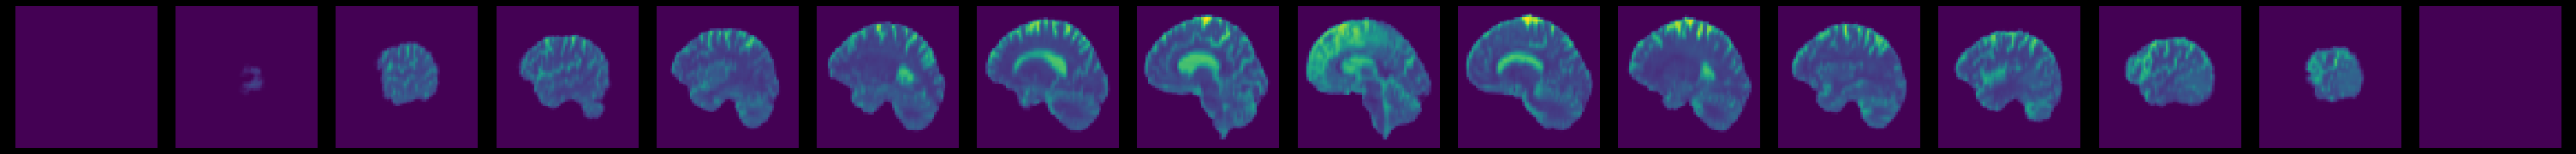

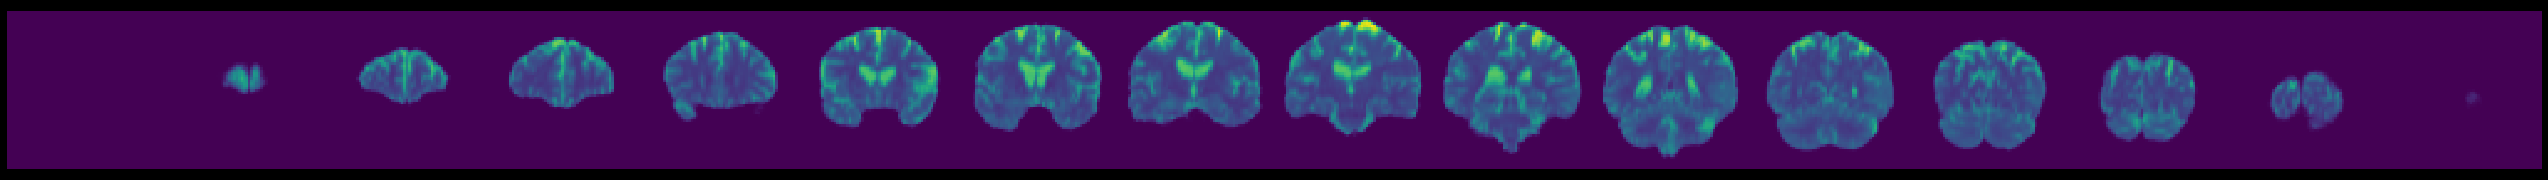

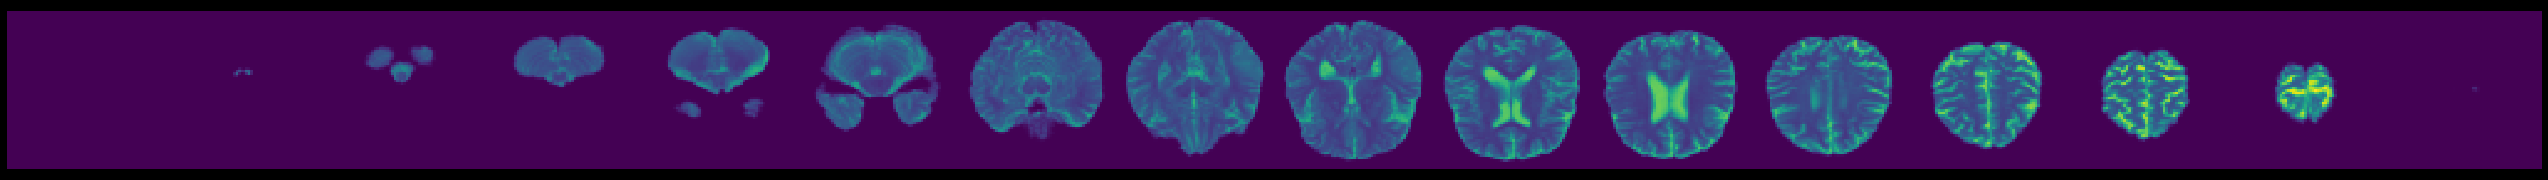

count: 1 processed: ../../BRATS/Training_brats/HGG//Brats18_CBICA_BHK_1/Brats18_CBICA_BHK_1_t2.nii


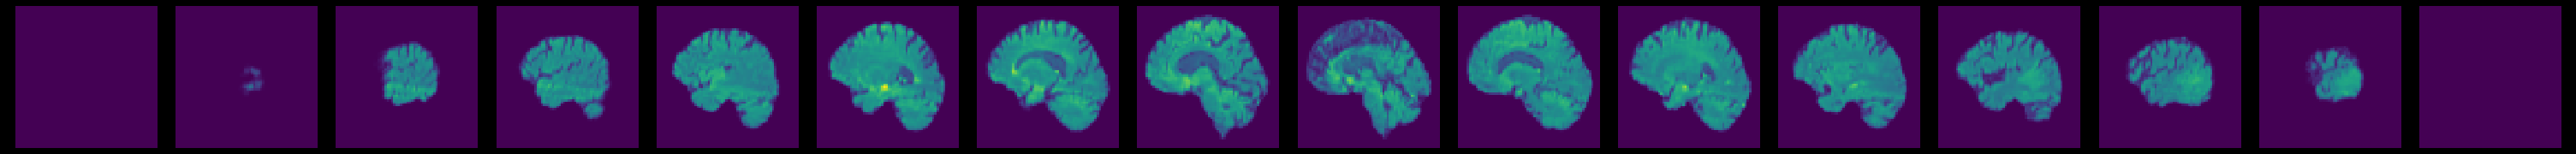

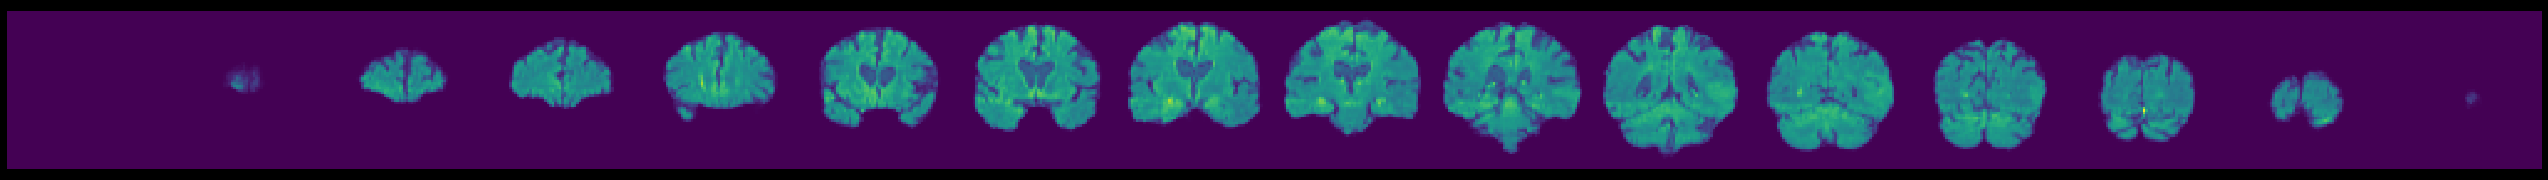

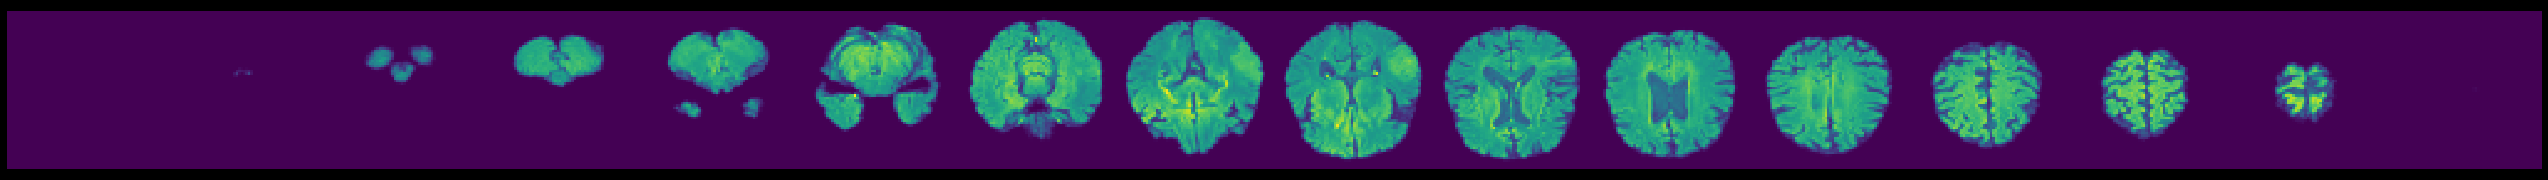

count: 2 processed: ../../BRATS/Training_brats/HGG//Brats18_CBICA_BHK_1/Brats18_CBICA_BHK_1_flair.nii


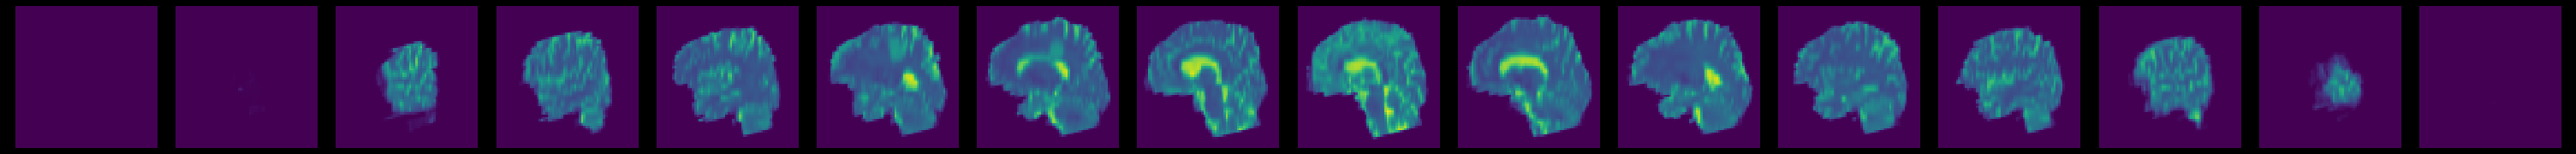

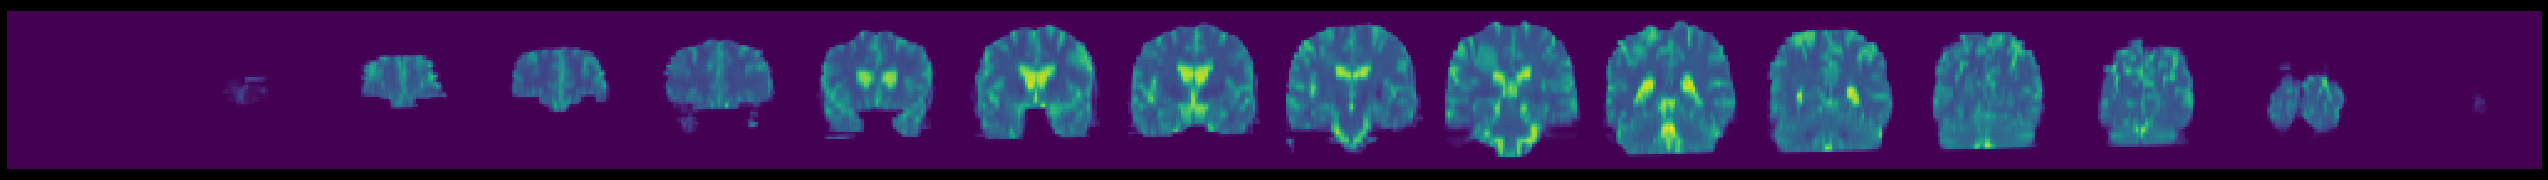

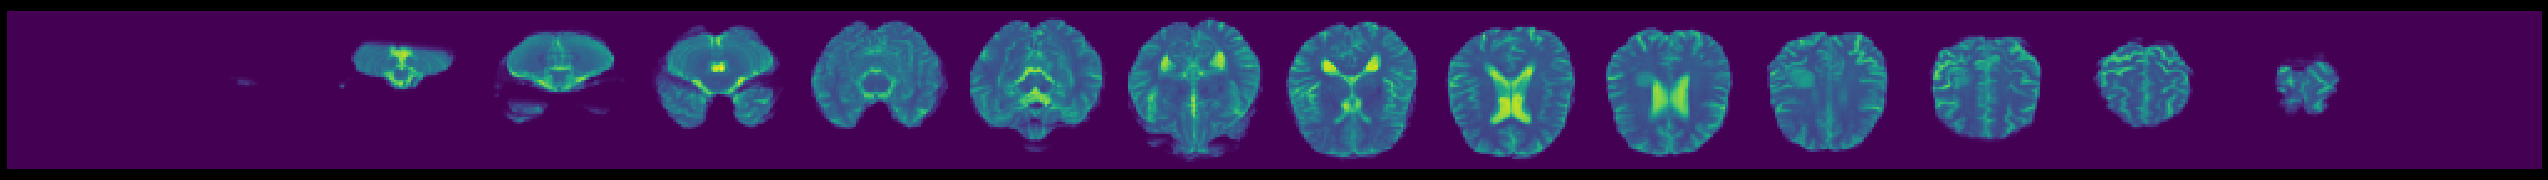

count: 3 processed: ../../BRATS/Training_brats/HGG//Brats18_2013_26_1/Brats18_2013_26_1_t2.nii


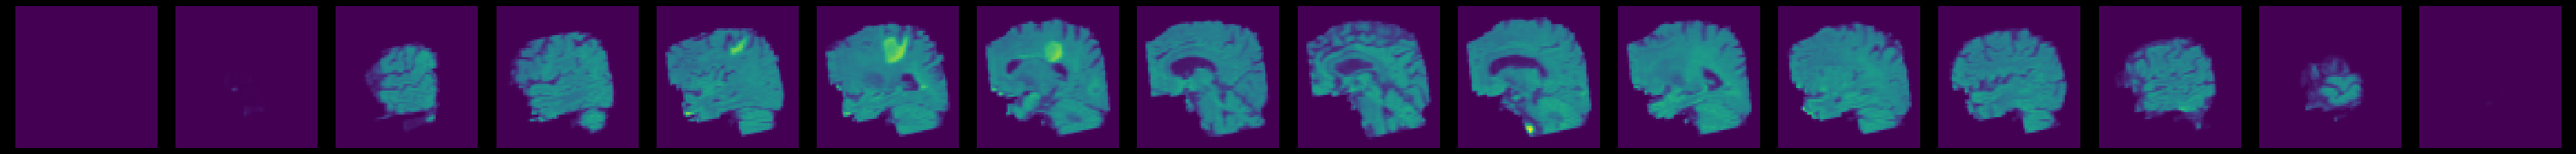

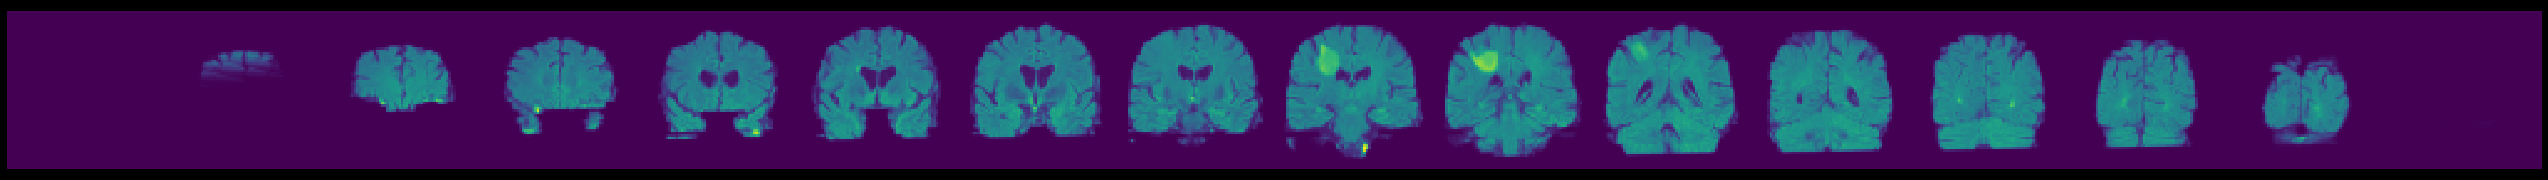

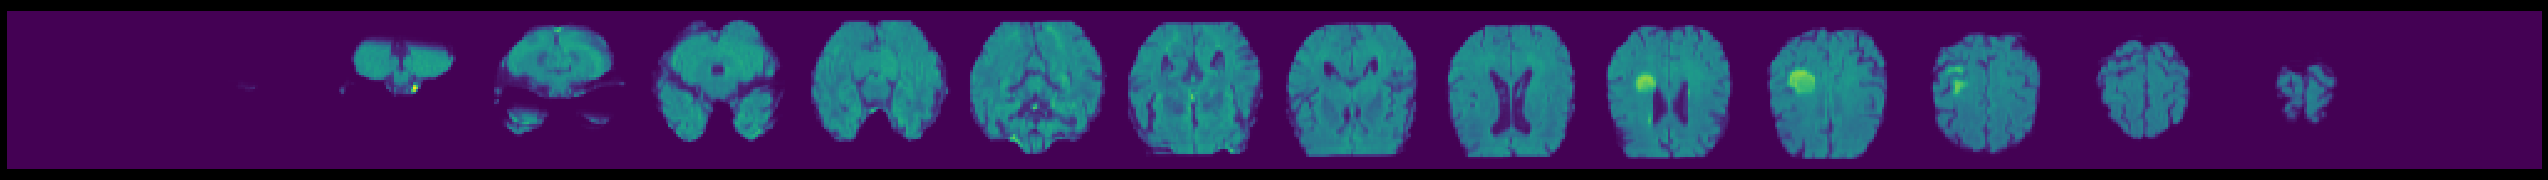

count: 4 processed: ../../BRATS/Training_brats/HGG//Brats18_2013_26_1/Brats18_2013_26_1_flair.nii


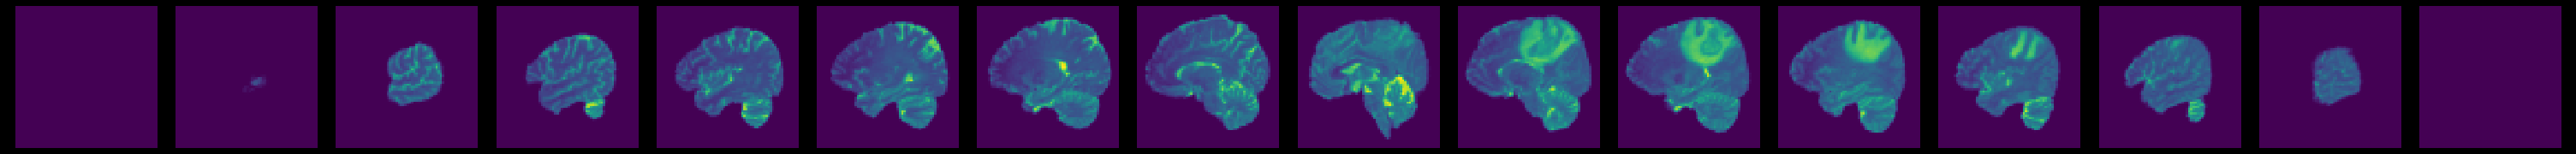

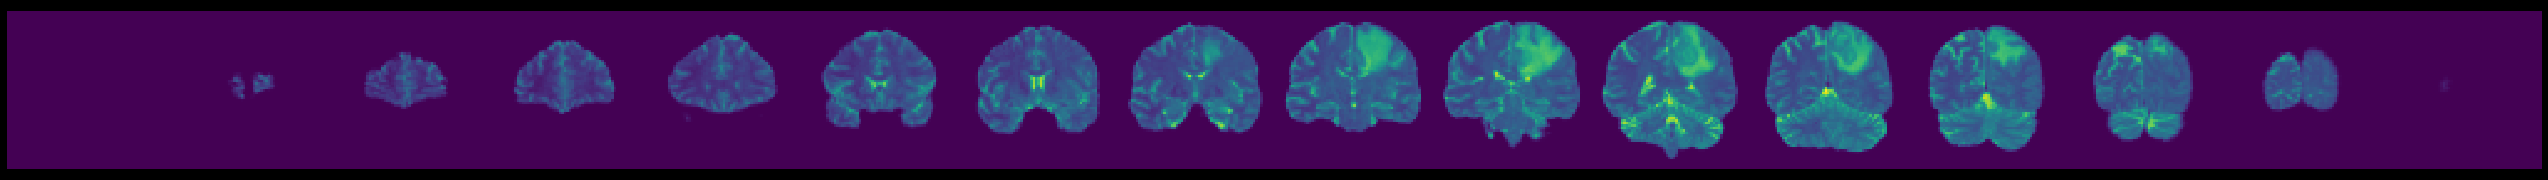

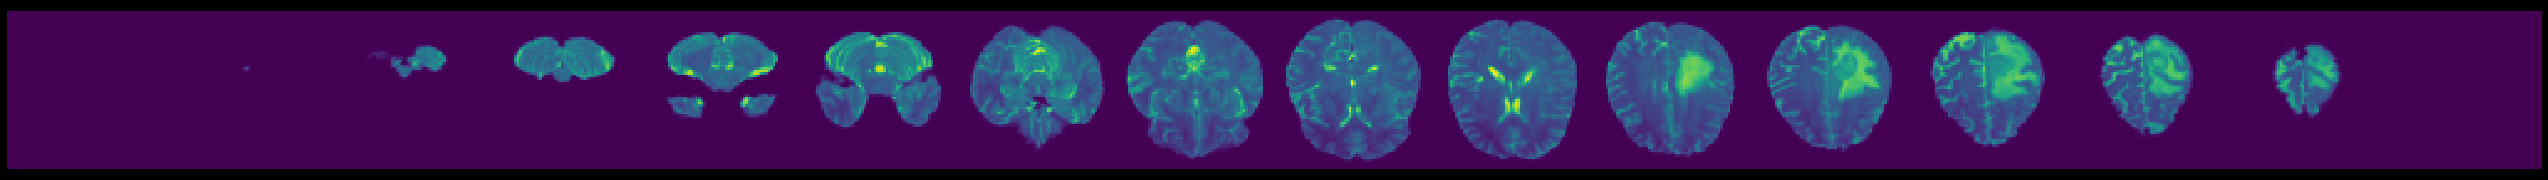

count: 5 processed: ../../BRATS/Training_brats/HGG//Brats18_CBICA_ATD_1/Brats18_CBICA_ATD_1_t2.nii


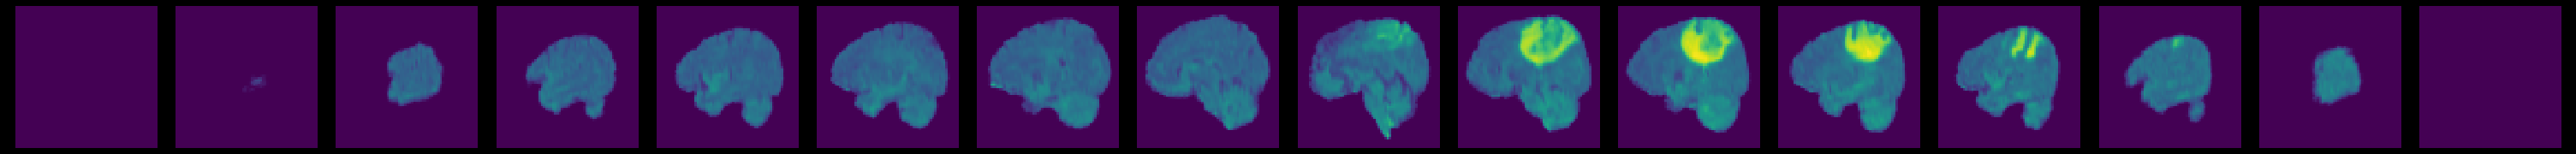

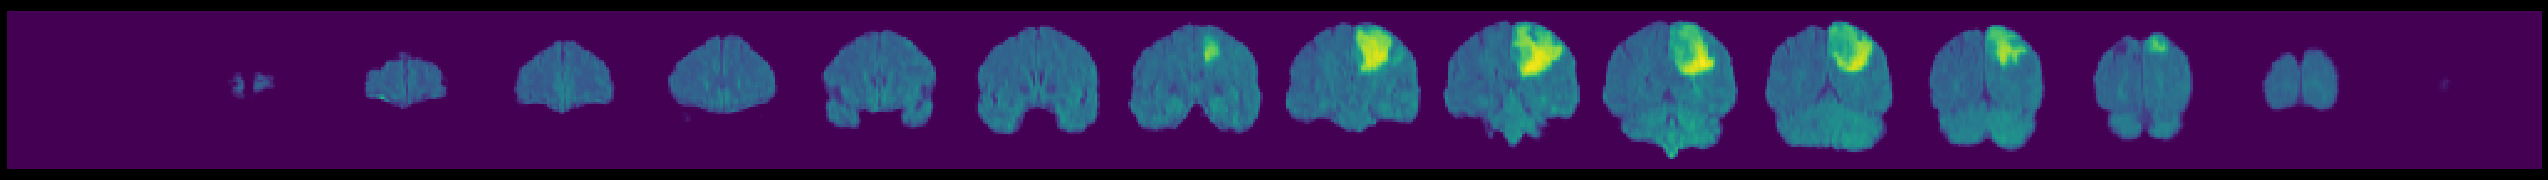

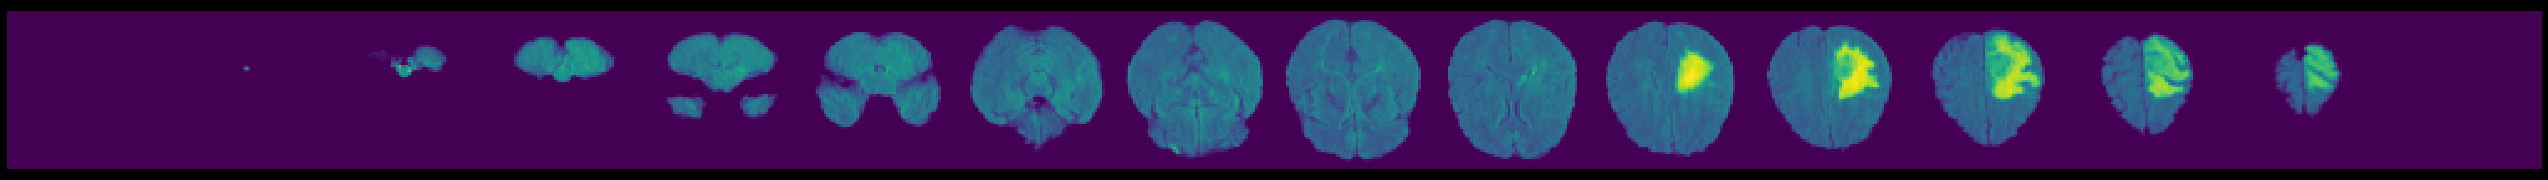

count: 6 processed: ../../BRATS/Training_brats/HGG//Brats18_CBICA_ATD_1/Brats18_CBICA_ATD_1_flair.nii


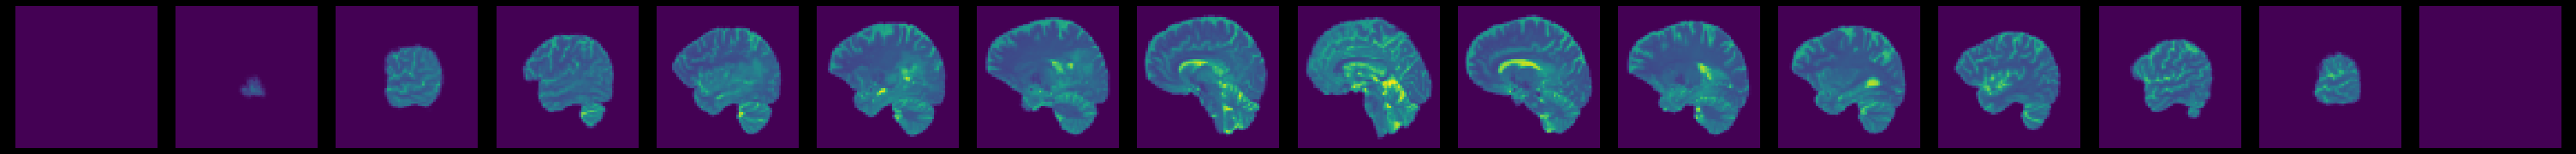

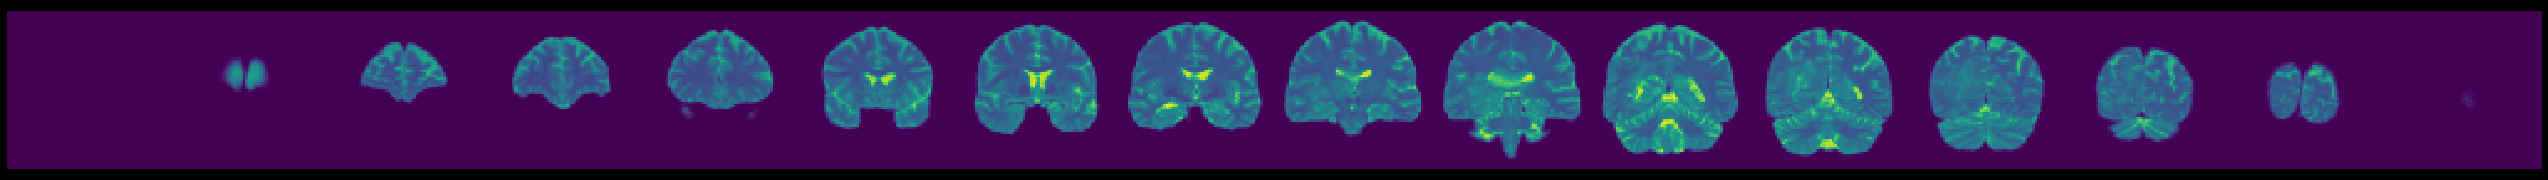

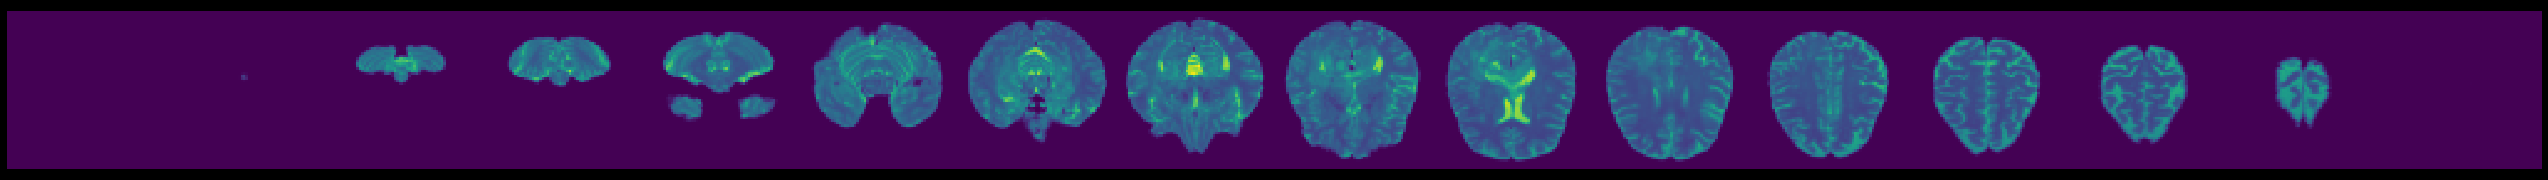

count: 7 processed: ../../BRATS/Training_brats/HGG//Brats18_CBICA_ANP_1/Brats18_CBICA_ANP_1_t2.nii


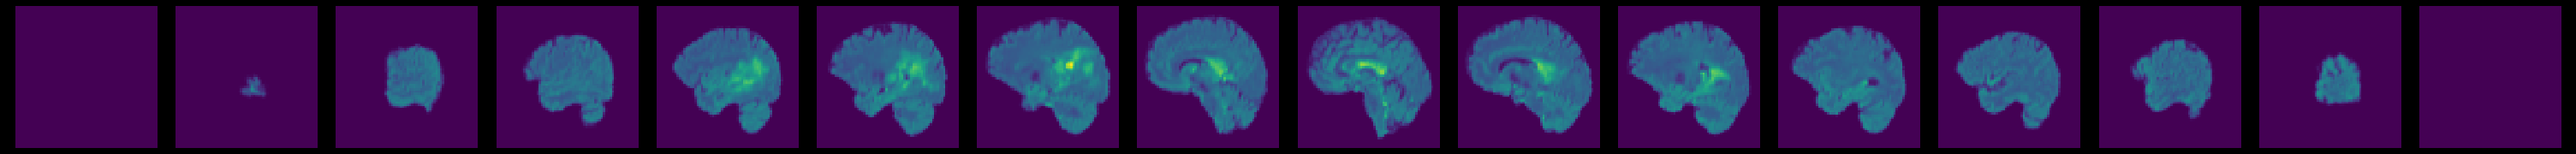

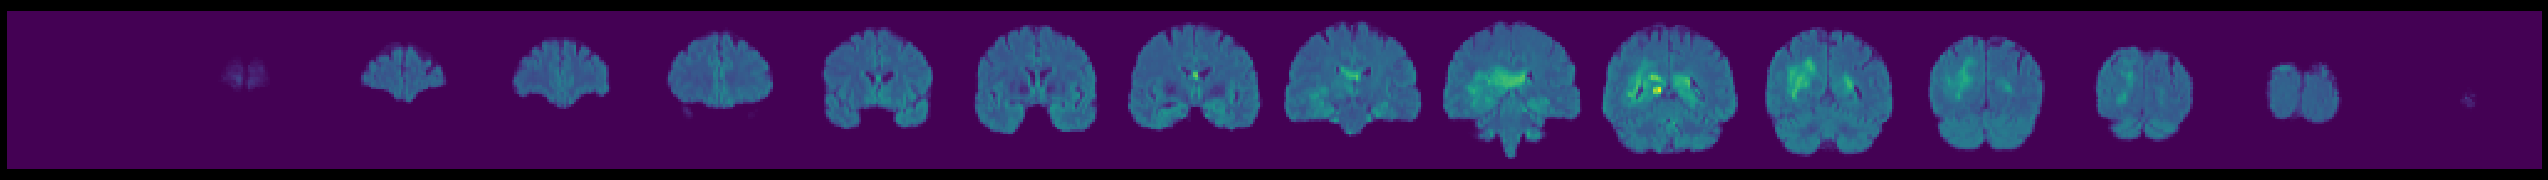

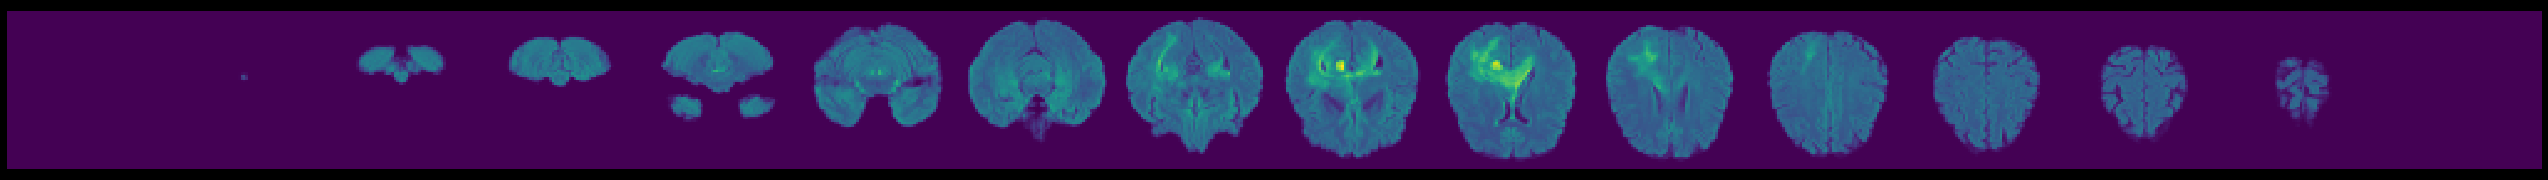

count: 8 processed: ../../BRATS/Training_brats/HGG//Brats18_CBICA_ANP_1/Brats18_CBICA_ANP_1_flair.nii


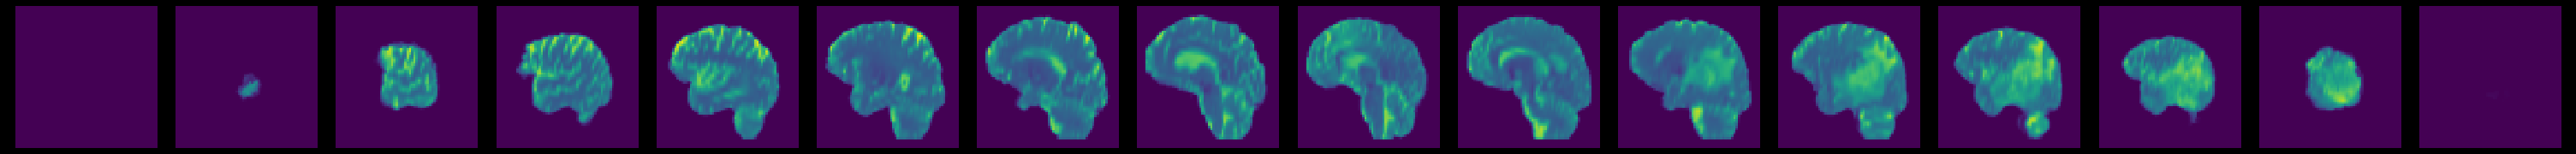

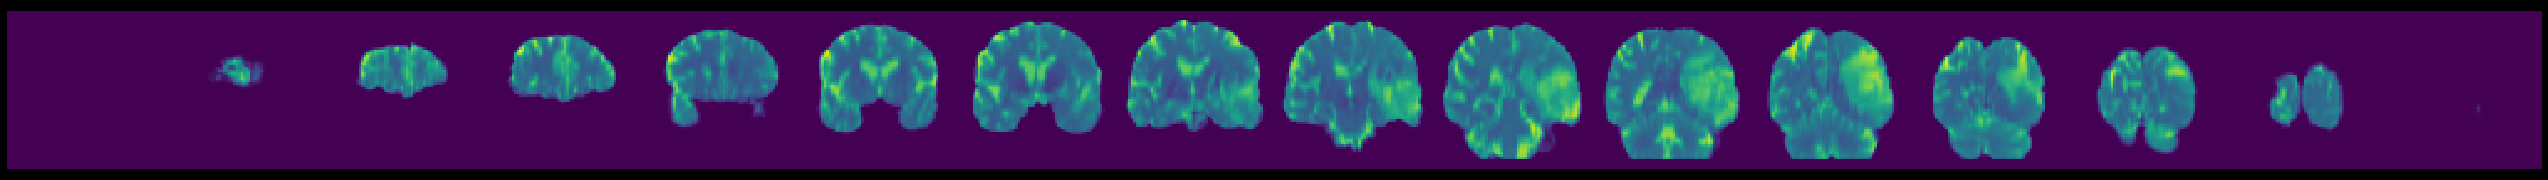

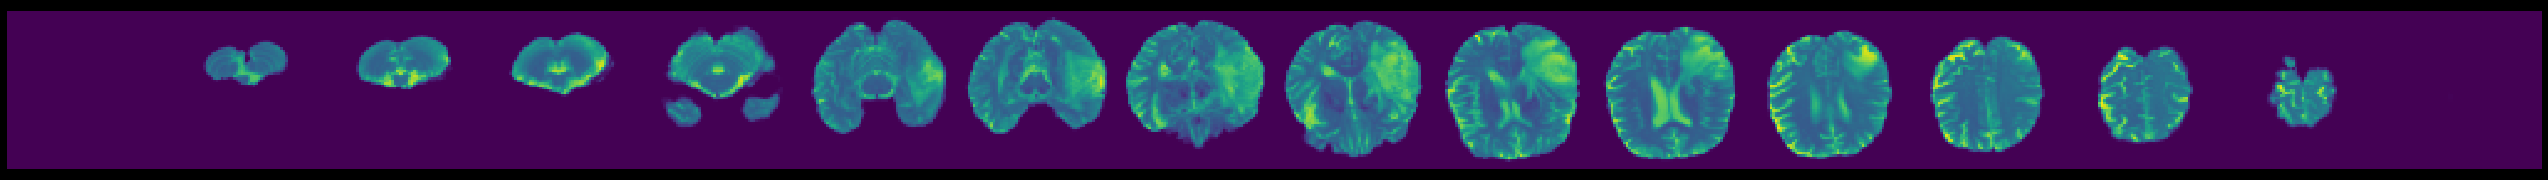

count: 9 processed: ../../BRATS/Training_brats/HGG//Brats18_TCIA08_167_1/Brats18_TCIA08_167_1_t2.nii


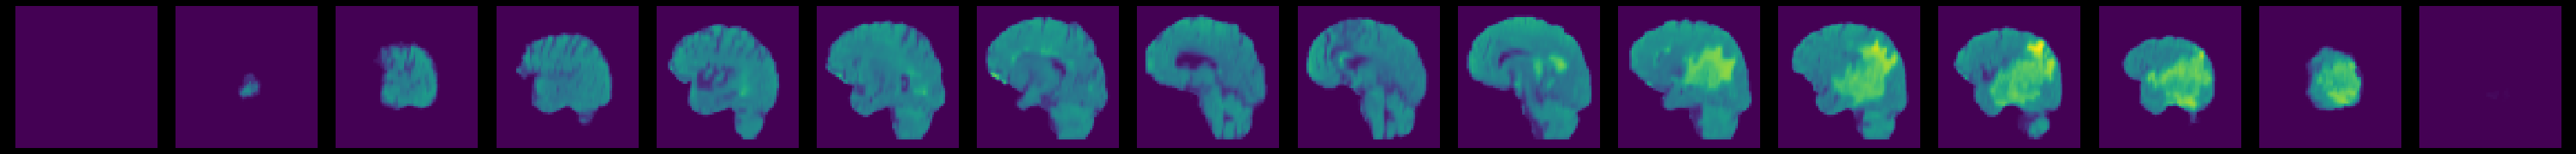

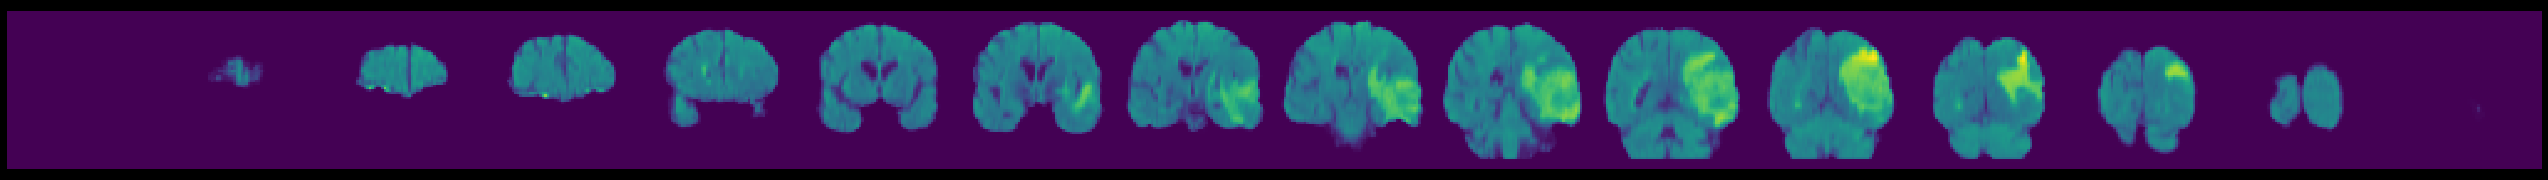

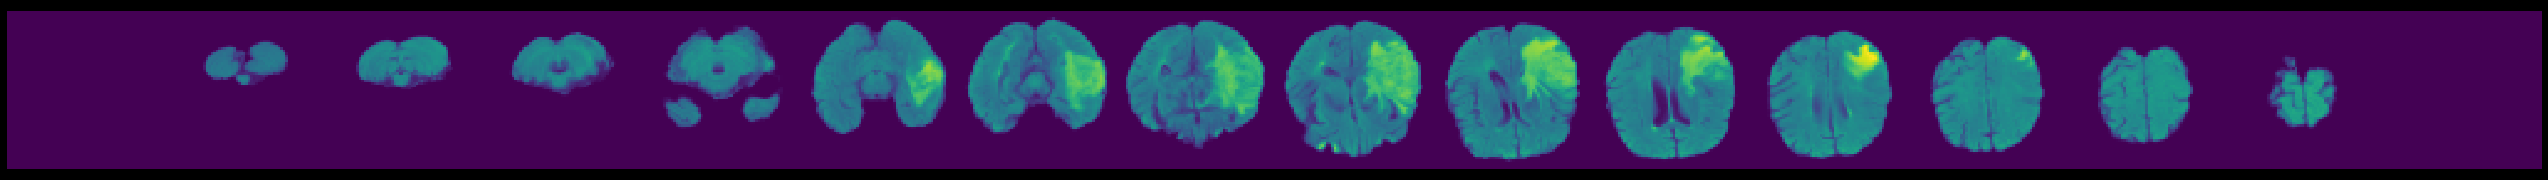

count: 10 processed: ../../BRATS/Training_brats/HGG//Brats18_TCIA08_167_1/Brats18_TCIA08_167_1_flair.nii


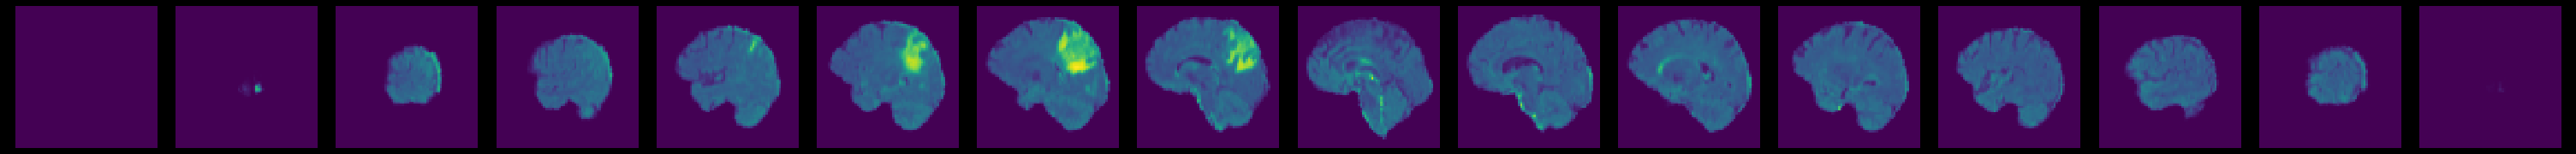

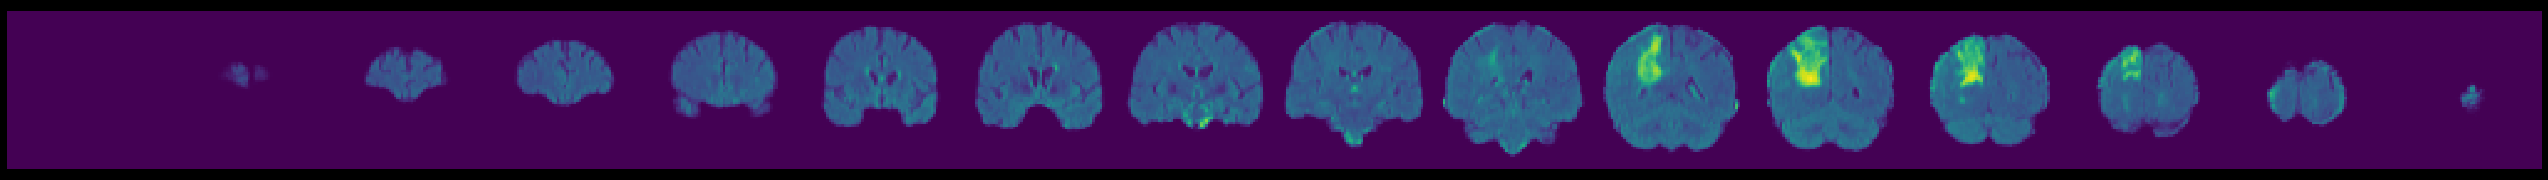

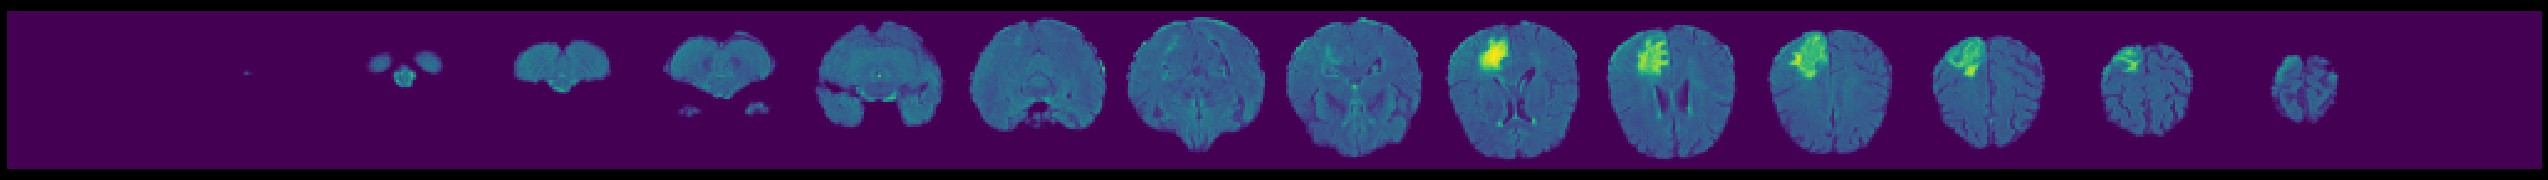

count: 11 processed: ../../BRATS/Training_brats/HGG//Brats18_CBICA_ASU_1/Brats18_CBICA_ASU_1_flair.nii


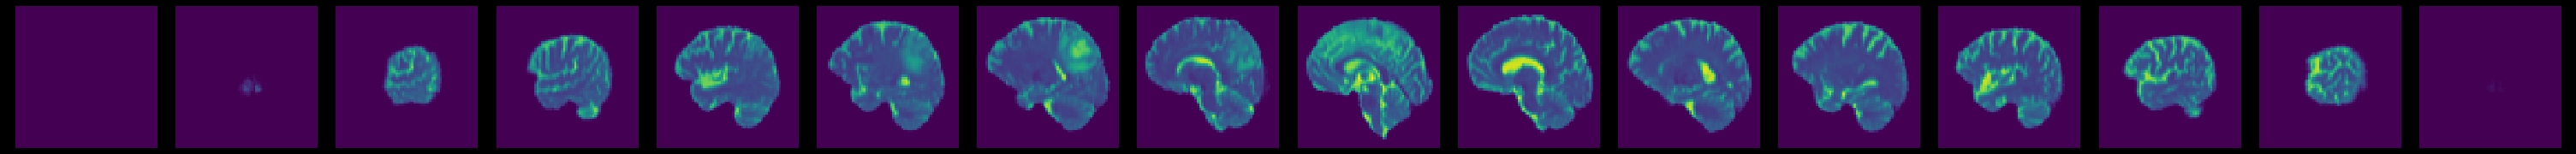

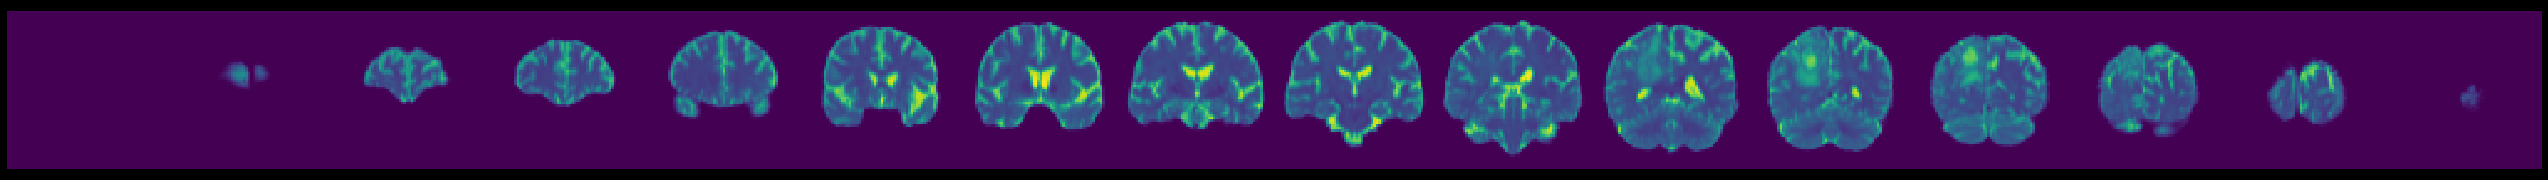

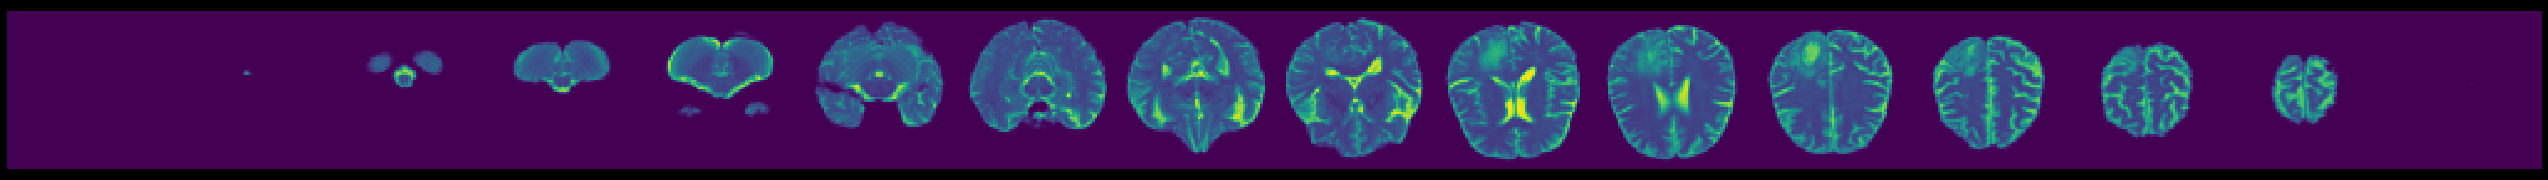

count: 12 processed: ../../BRATS/Training_brats/HGG//Brats18_CBICA_ASU_1/Brats18_CBICA_ASU_1_t2.nii


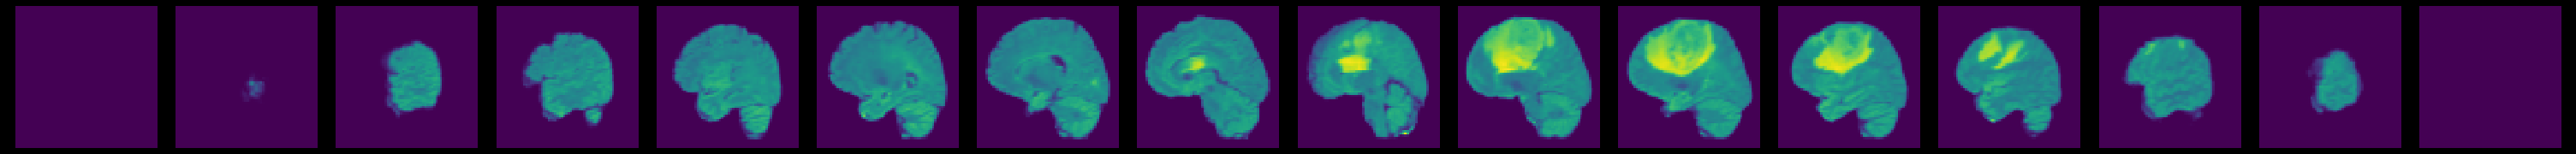

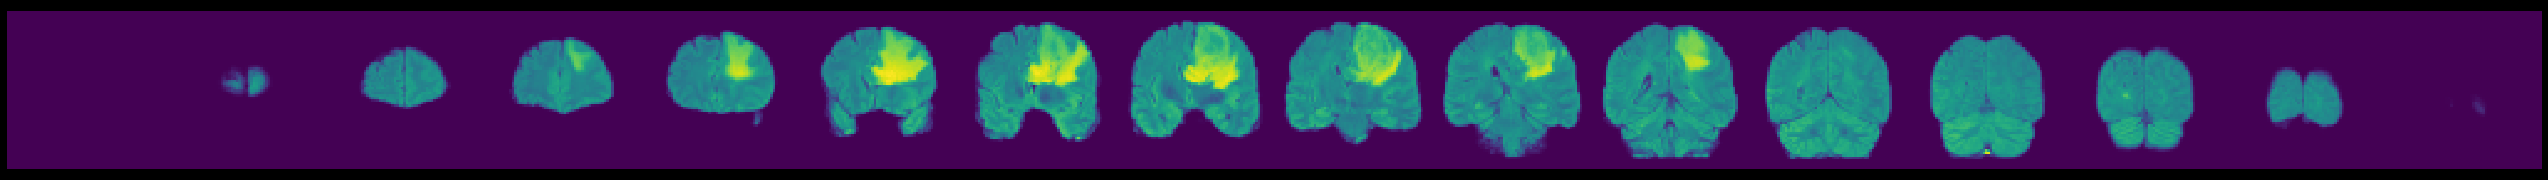

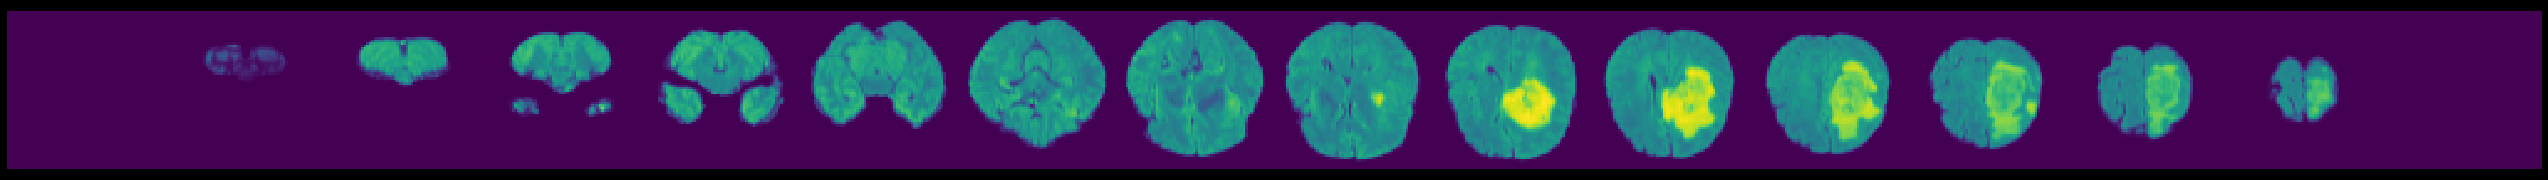

count: 13 processed: ../../BRATS/Training_brats/HGG//Brats18_2013_7_1/Brats18_2013_7_1_flair.nii


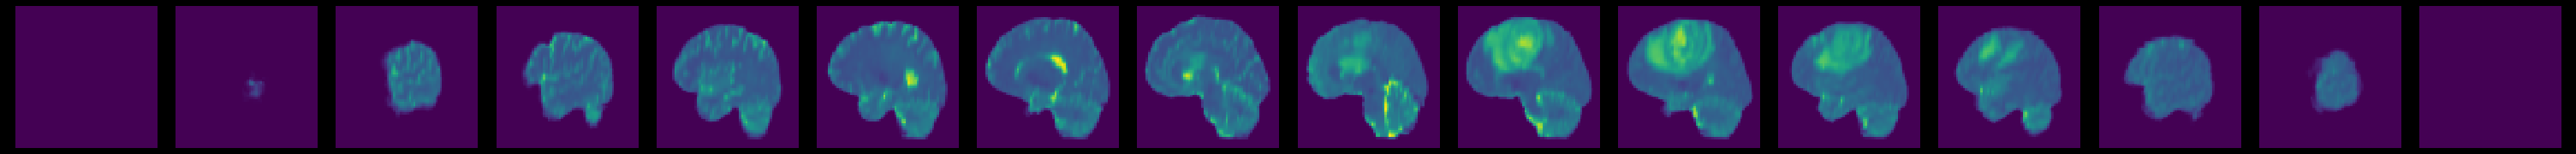

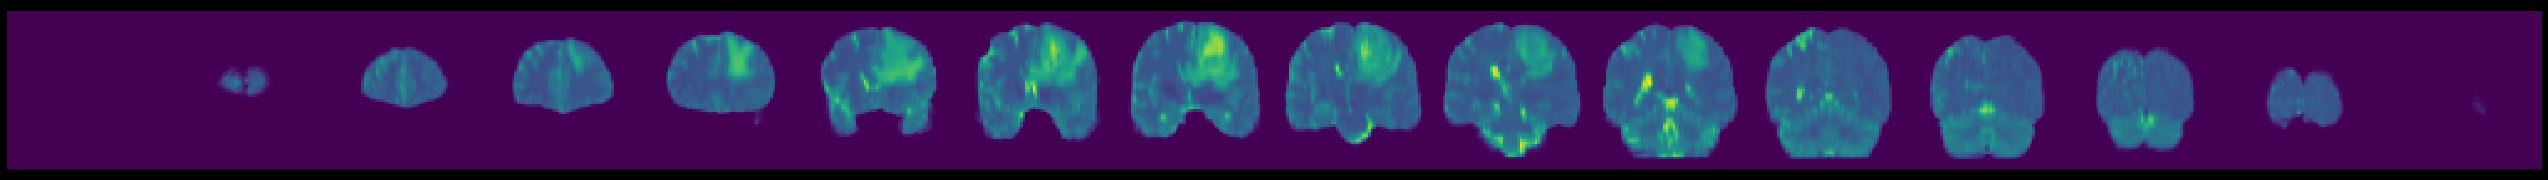

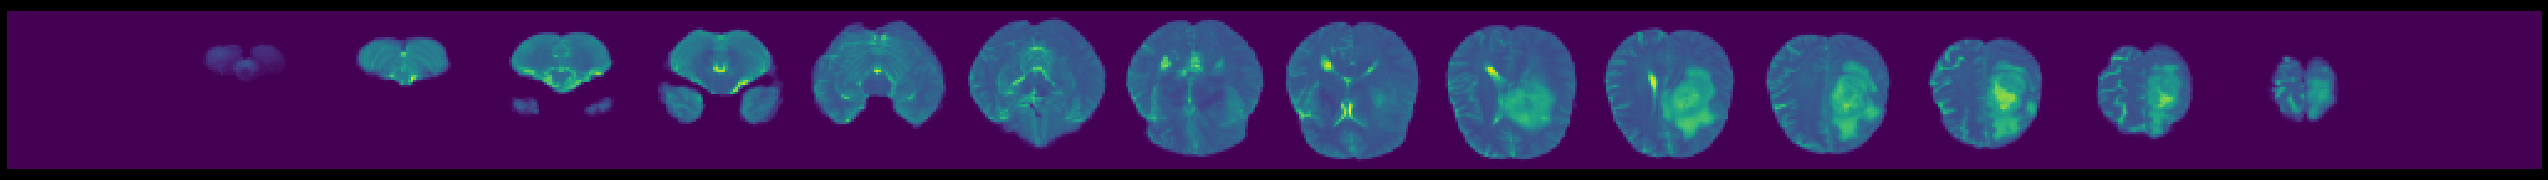

count: 14 processed: ../../BRATS/Training_brats/HGG//Brats18_2013_7_1/Brats18_2013_7_1_t2.nii


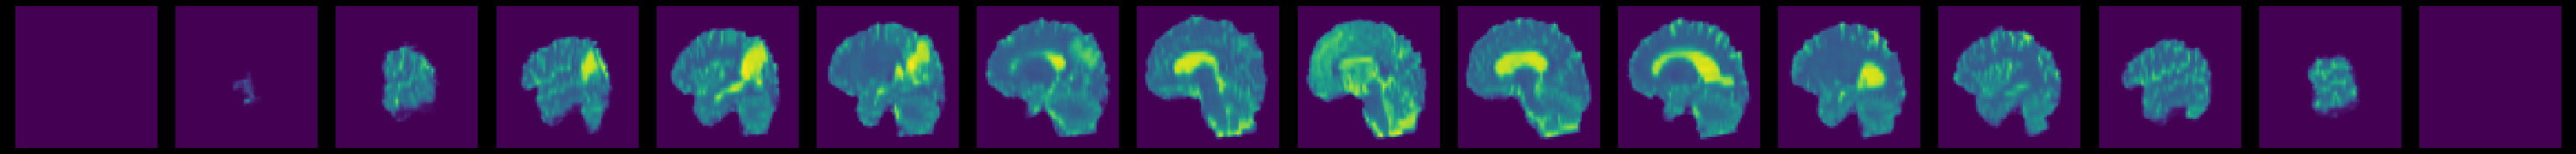

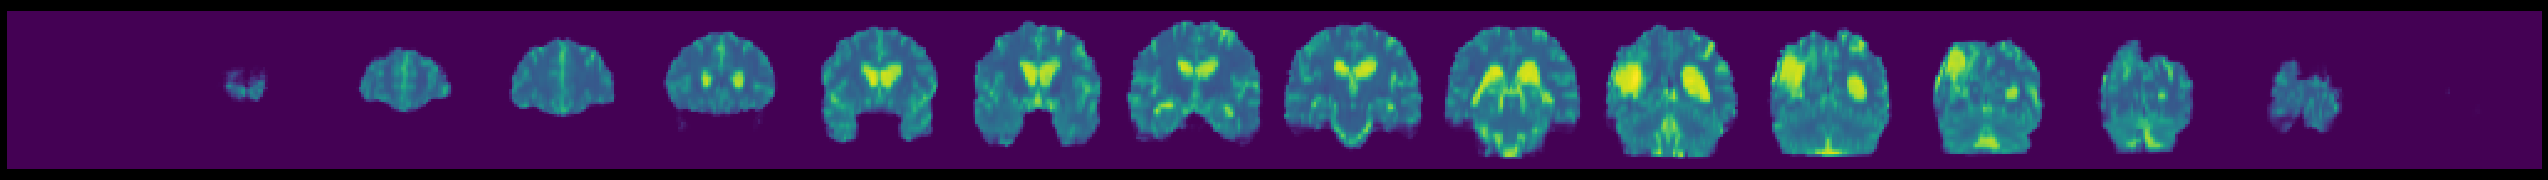

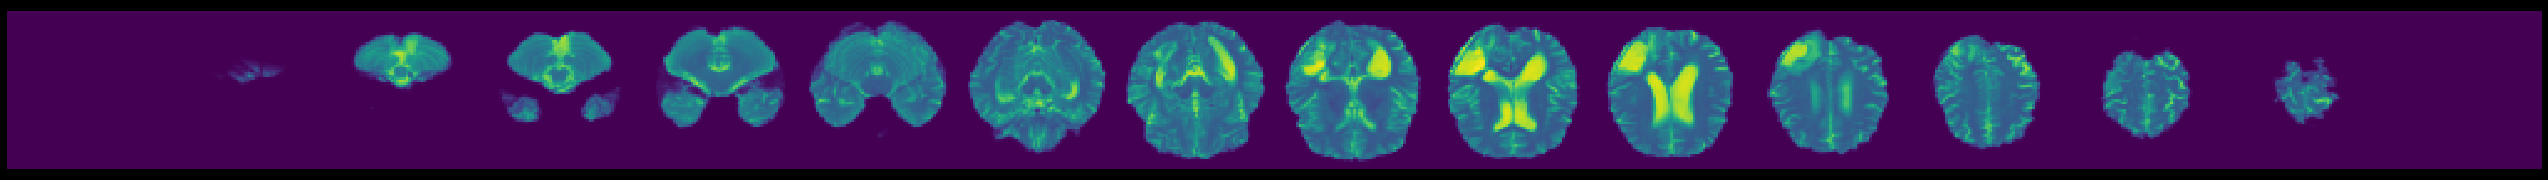

count: 15 processed: ../../BRATS/Training_brats/HGG//Brats18_2013_19_1/Brats18_2013_19_1_t2.nii


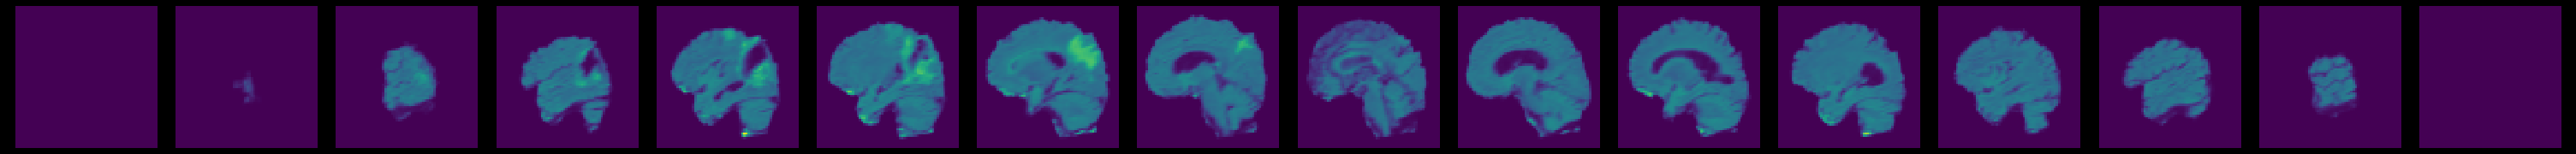

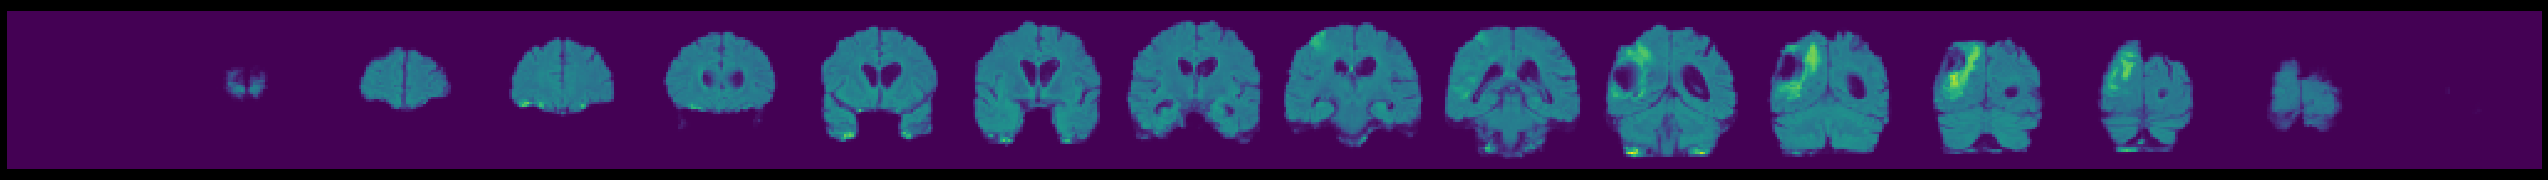

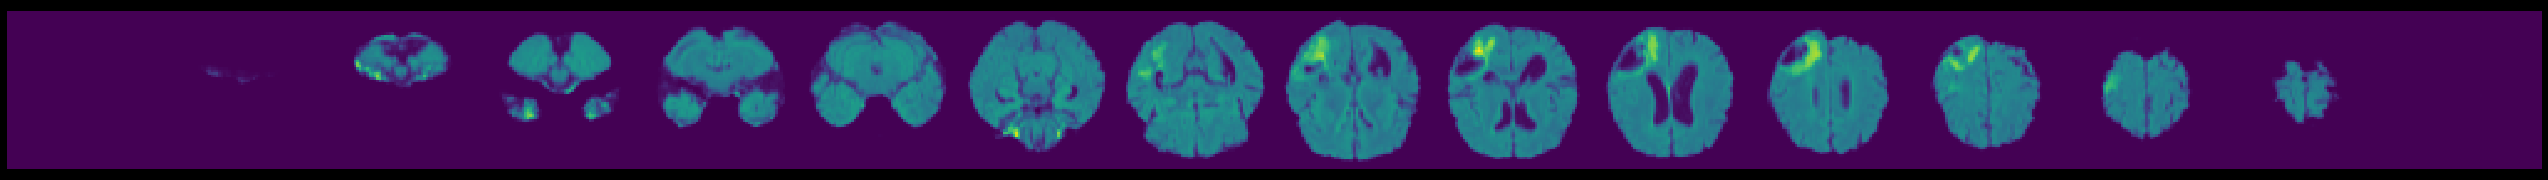

count: 16 processed: ../../BRATS/Training_brats/HGG//Brats18_2013_19_1/Brats18_2013_19_1_flair.nii


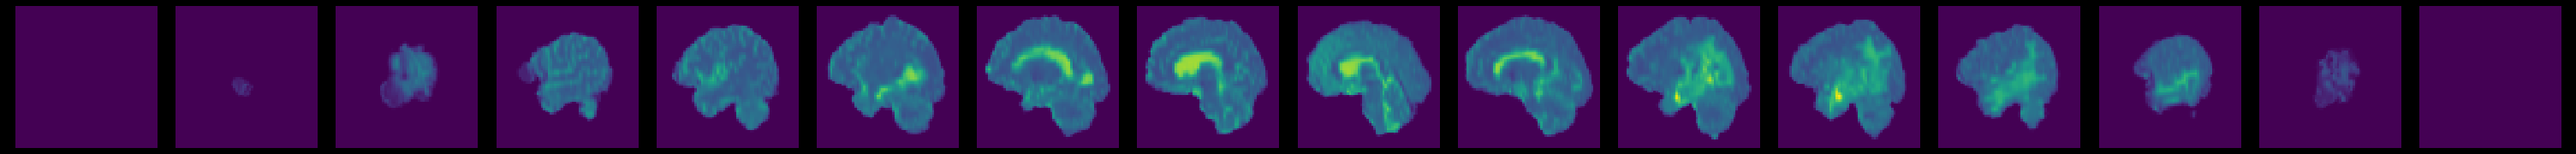

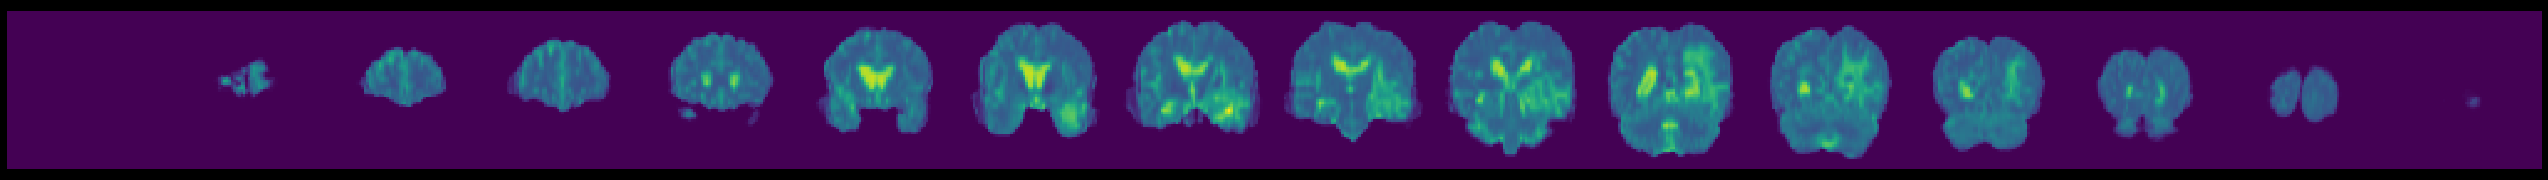

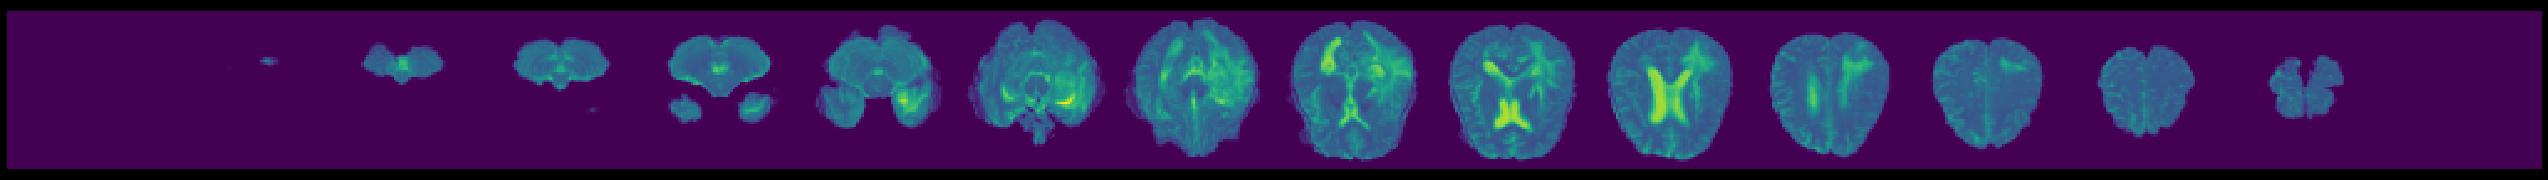

count: 17 processed: ../../BRATS/Training_brats/HGG//Brats18_TCIA01_147_1/Brats18_TCIA01_147_1_t2.nii


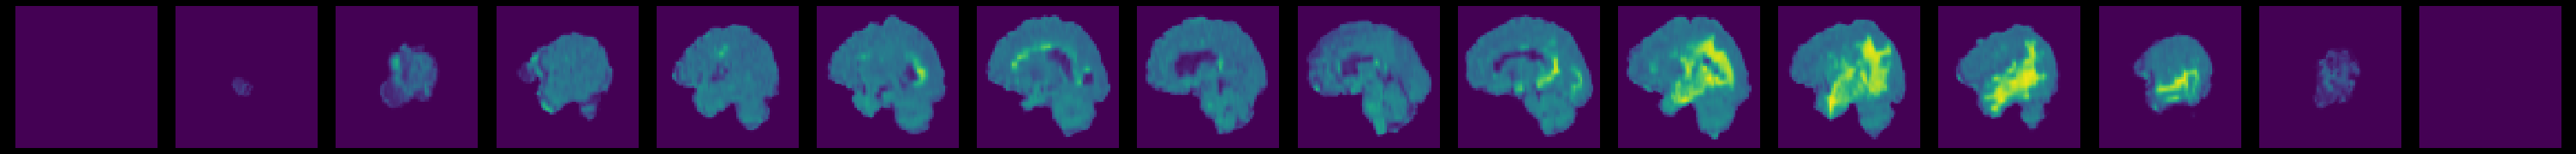

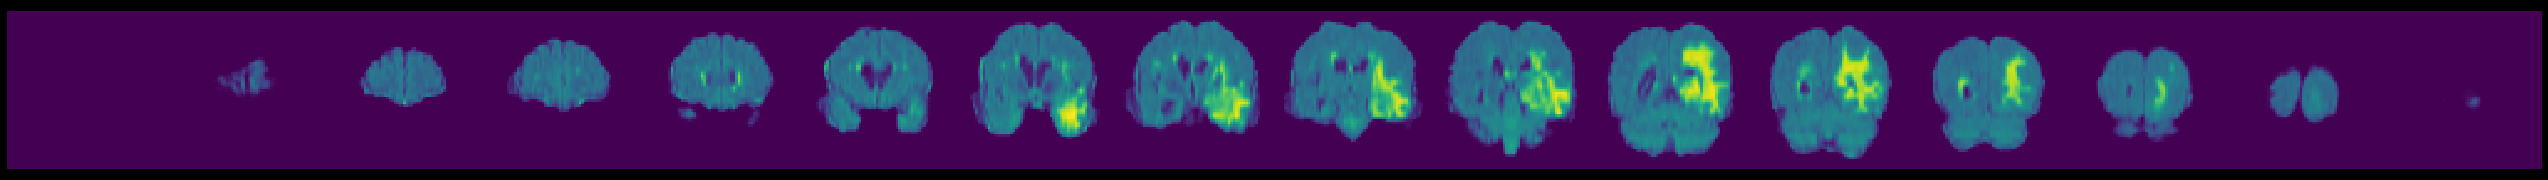

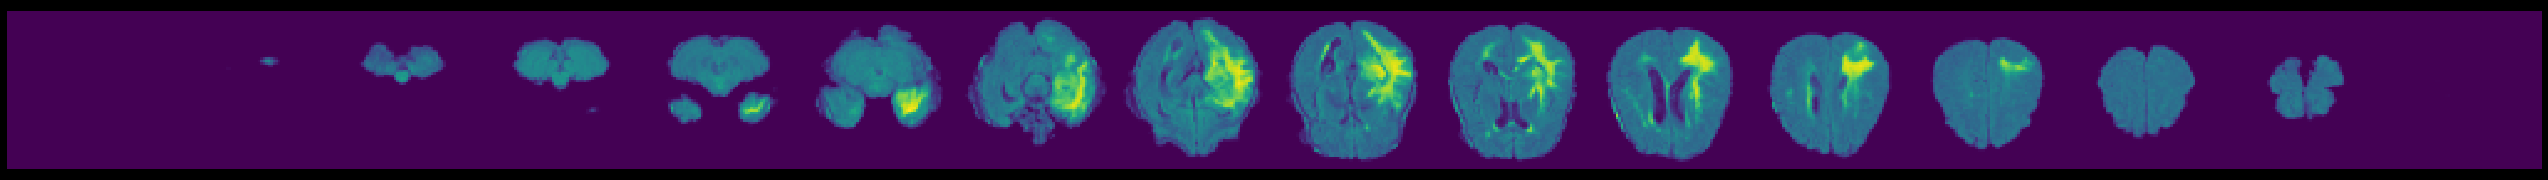

count: 18 processed: ../../BRATS/Training_brats/HGG//Brats18_TCIA01_147_1/Brats18_TCIA01_147_1_flair.nii


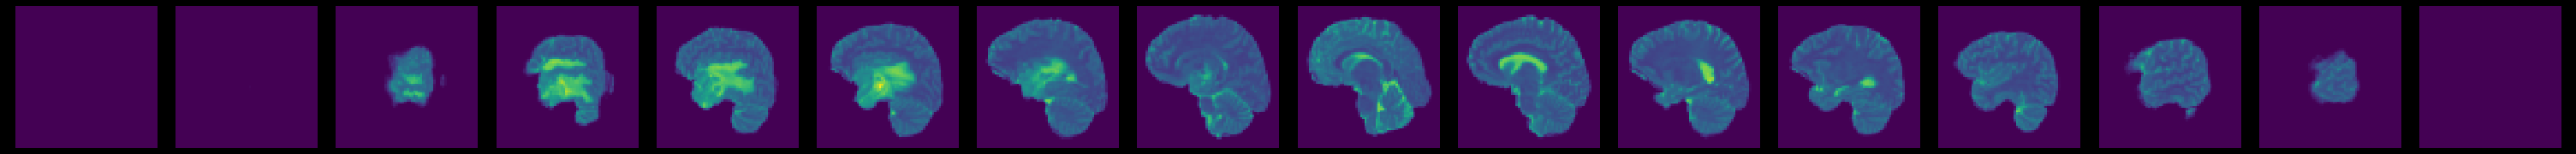

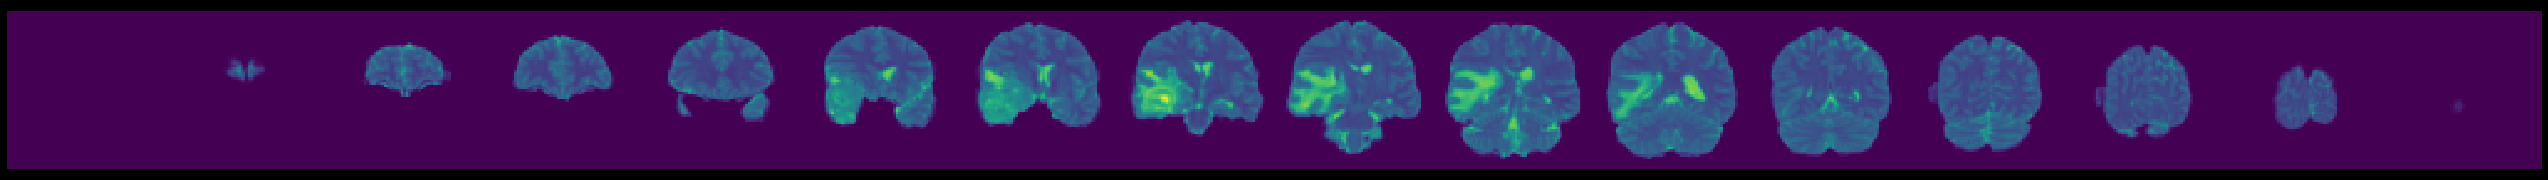

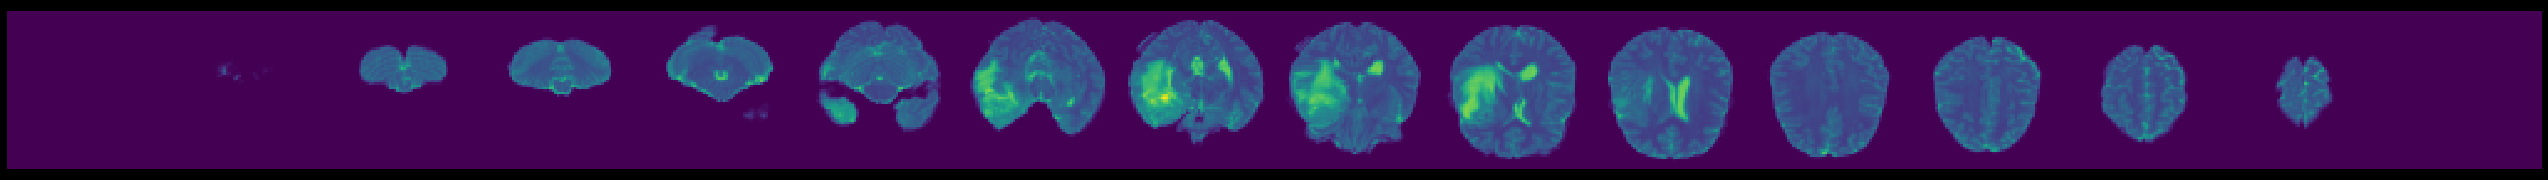

count: 19 processed: ../../BRATS/Training_brats/HGG//Brats18_TCIA03_121_1/Brats18_TCIA03_121_1_t2.nii


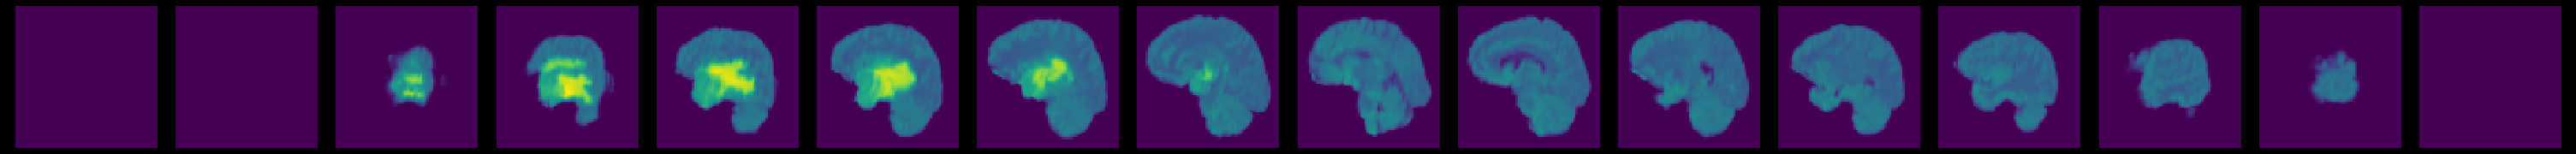

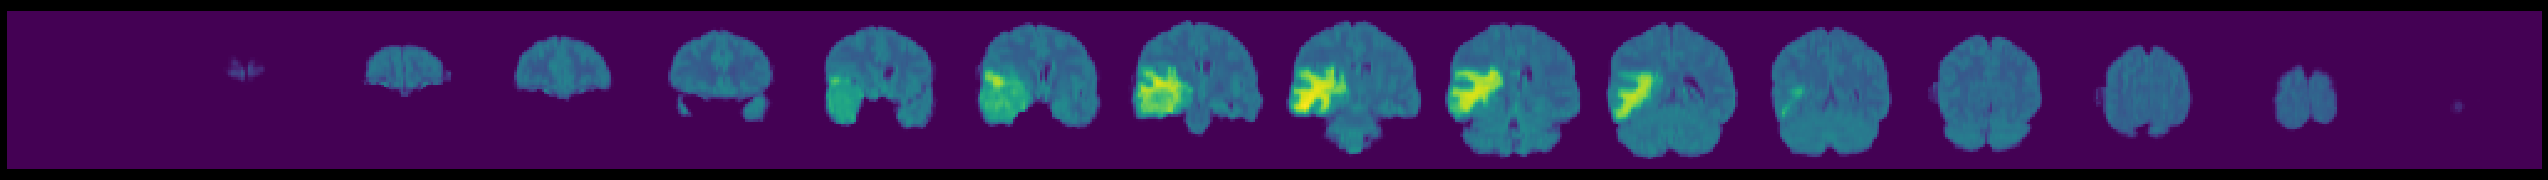

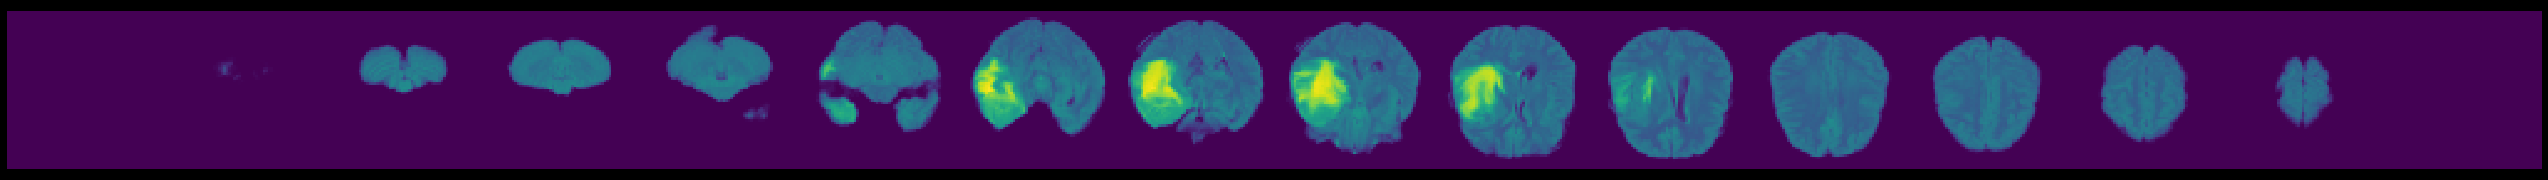

count: 20 processed: ../../BRATS/Training_brats/HGG//Brats18_TCIA03_121_1/Brats18_TCIA03_121_1_flair.nii


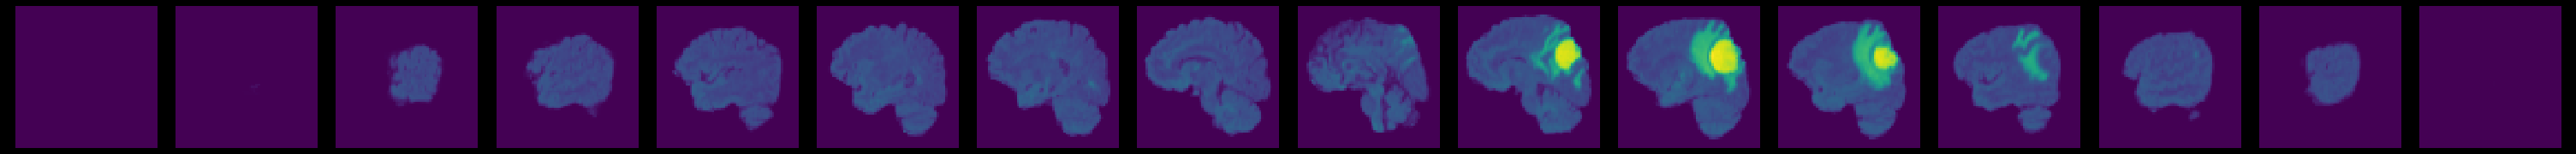

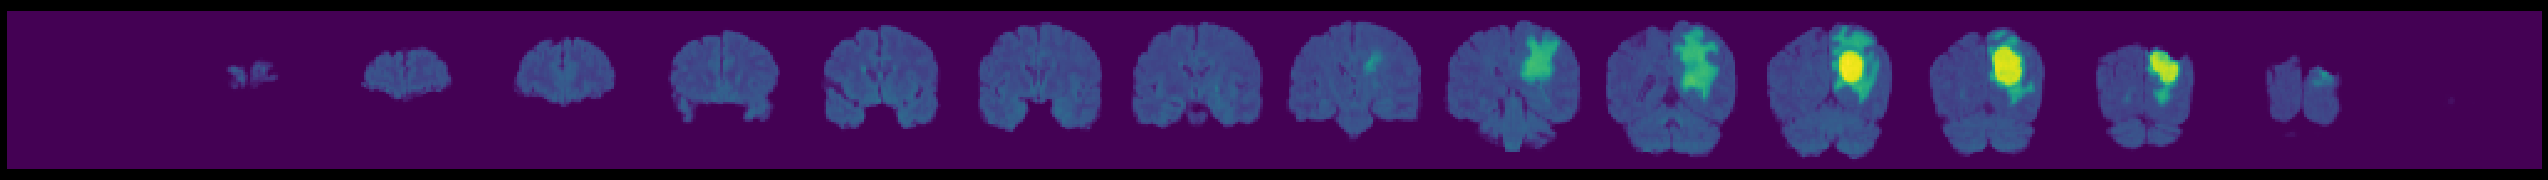

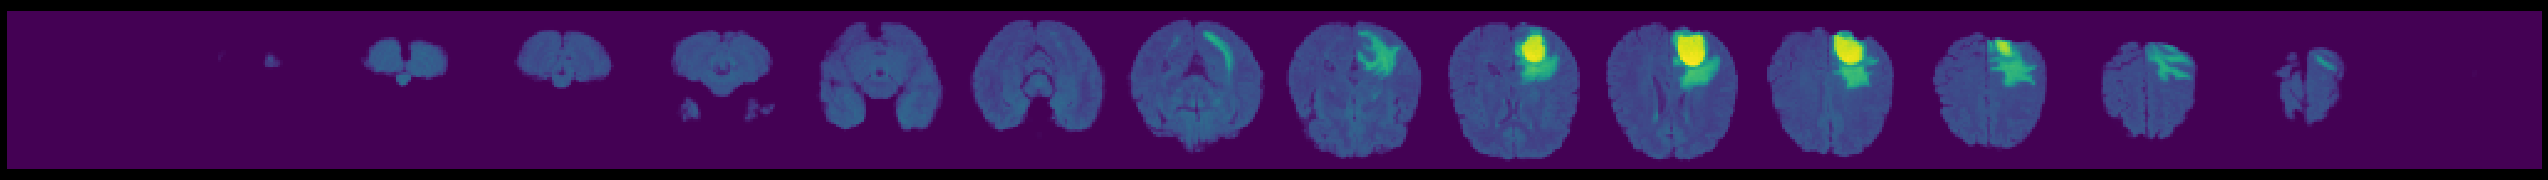

count: 21 processed: ../../BRATS/Training_brats/HGG//Brats18_TCIA02_151_1/Brats18_TCIA02_151_1_flair.nii


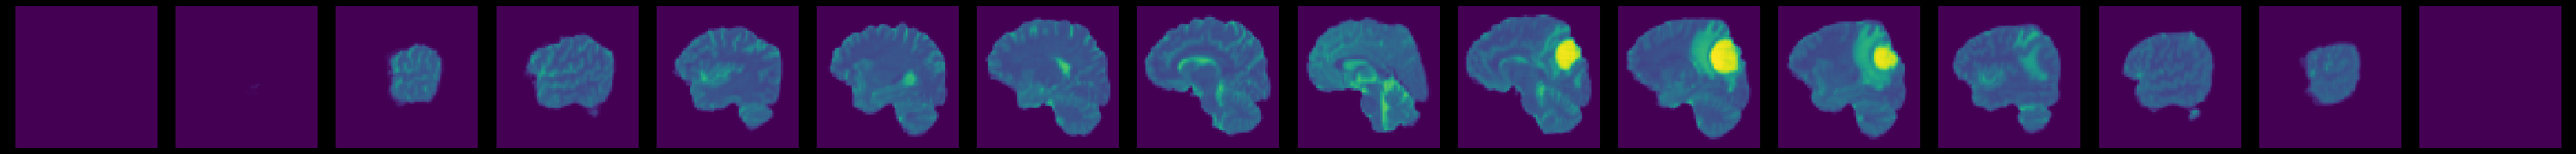

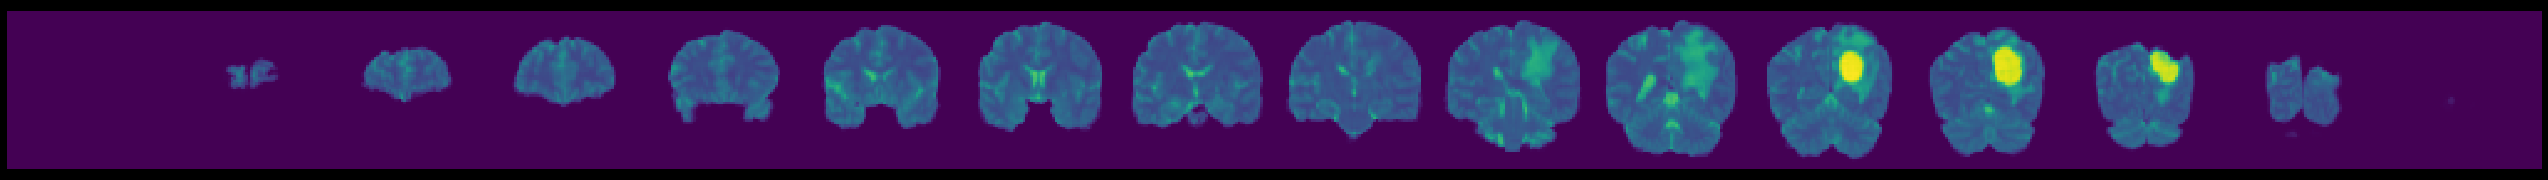

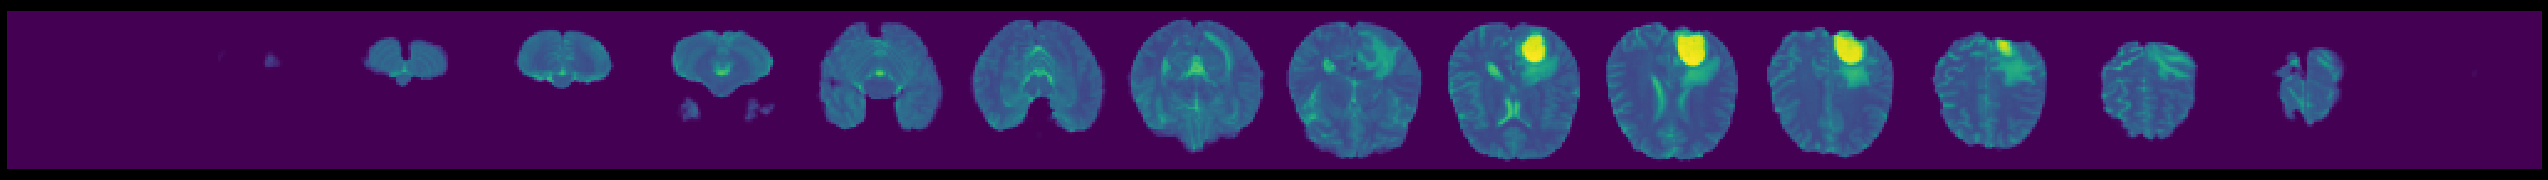

count: 22 processed: ../../BRATS/Training_brats/HGG//Brats18_TCIA02_151_1/Brats18_TCIA02_151_1_t2.nii


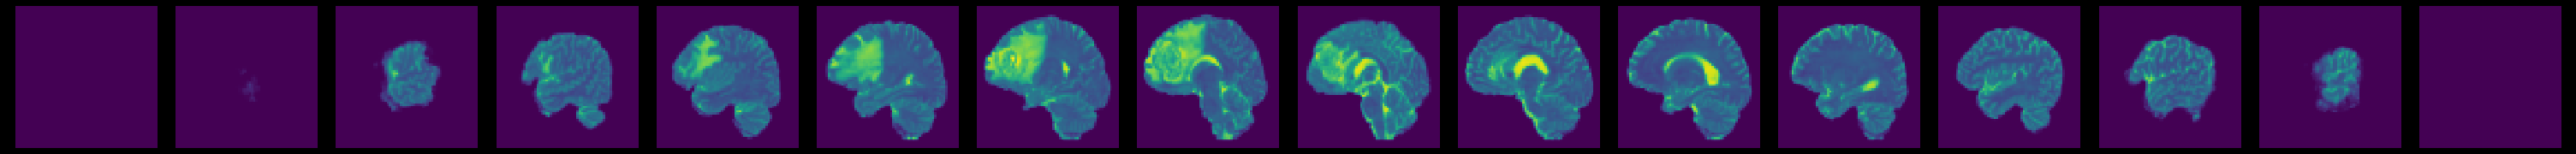

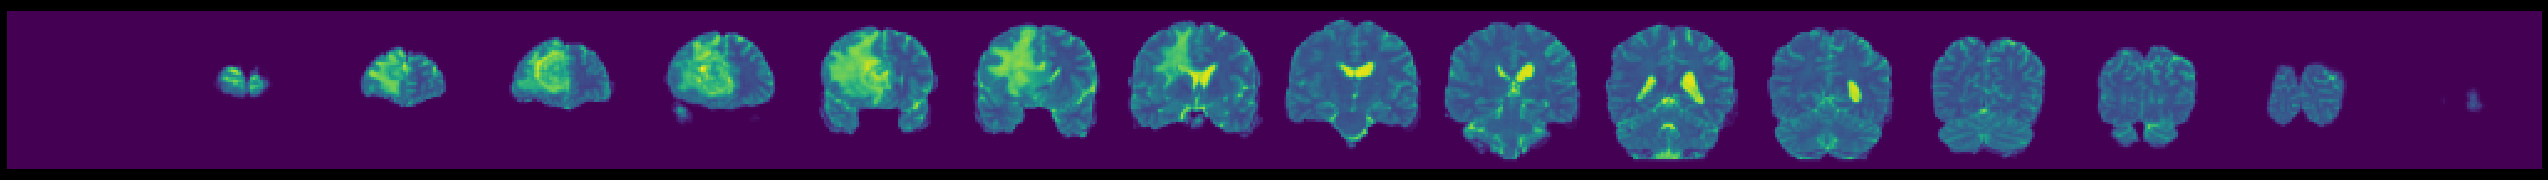

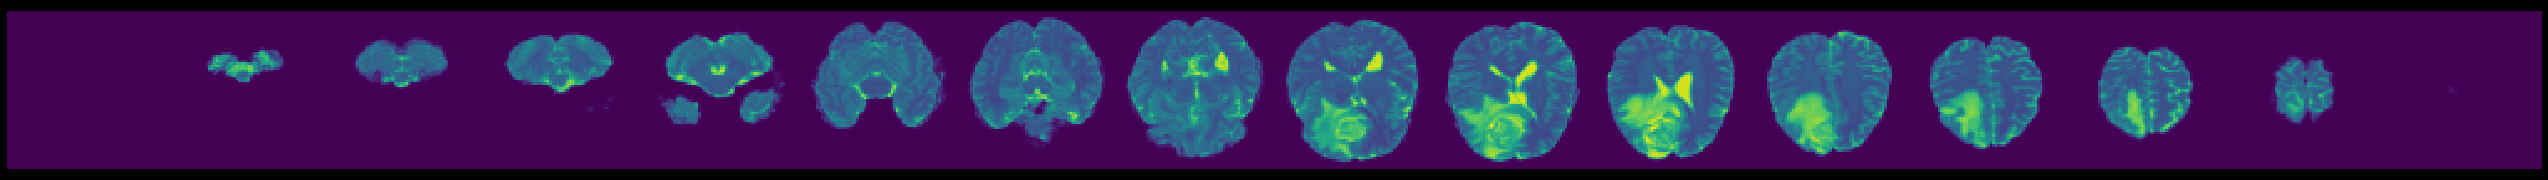

count: 23 processed: ../../BRATS/Training_brats/HGG//Brats18_TCIA03_199_1/Brats18_TCIA03_199_1_t2.nii


KeyboardInterrupt: 

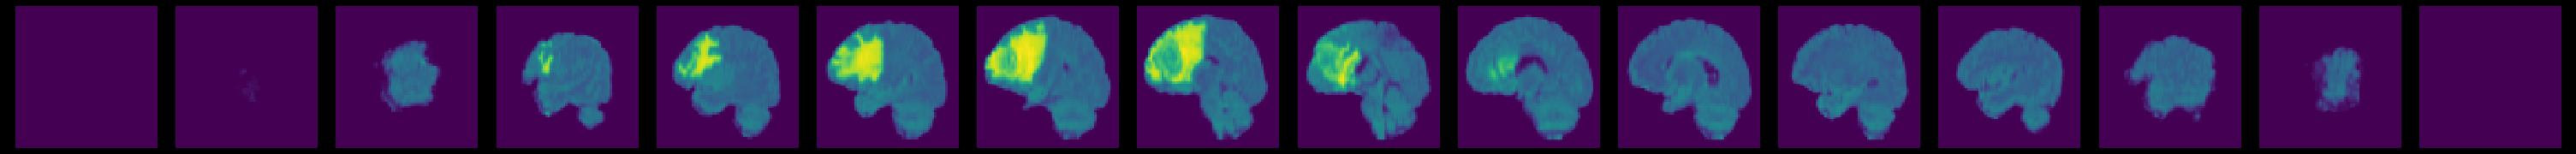

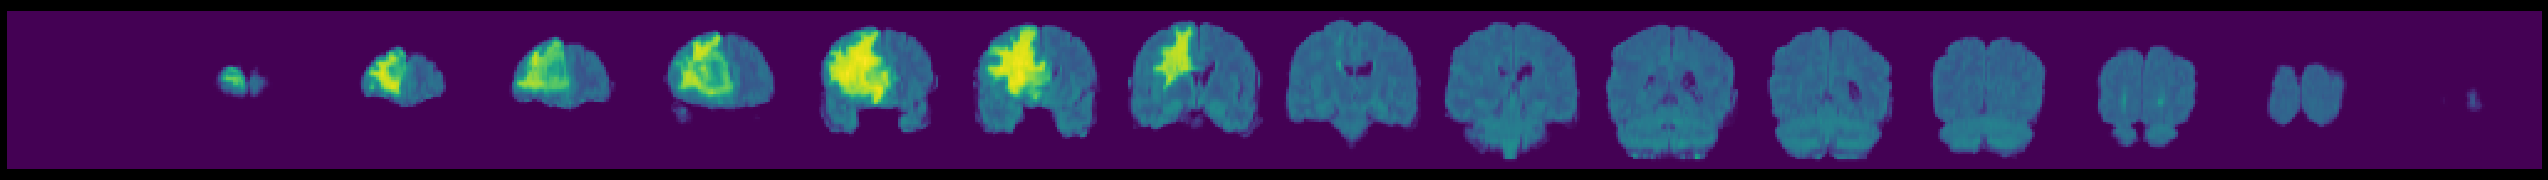

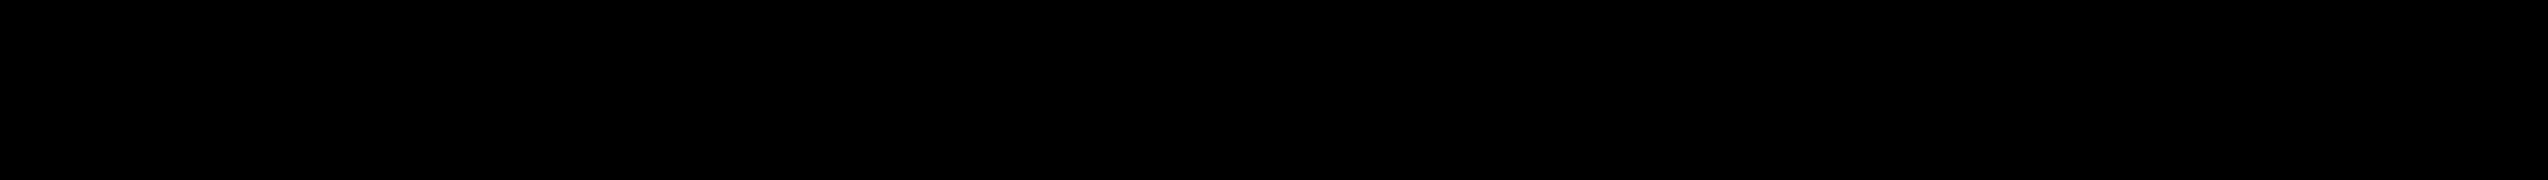

In [6]:
if __name__ == '__main__':
    dive('../../BRATS/Training_brats/HGG/')